# Анализ продаж видеоигр по миру

## Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Загрузка датасета

In [2]:
dataset = pd.read_csv("vgsales.csv", index_col=0)

dataset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


## EDA

### Информация о типах данных, пропущенных значениях и т. д.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


<Axes: >

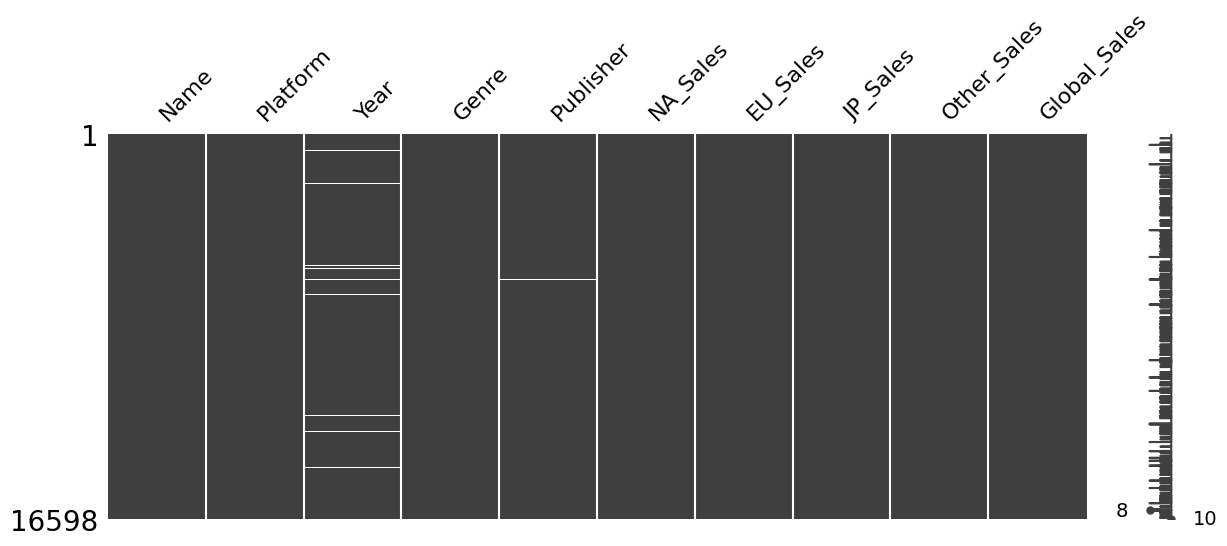

In [4]:
from missingno import matrix


matrix(dataset, figsize=(14, 5))

In [5]:
dataset.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Сделаем для пропущенных значений замену на моду (Publisher и Year). Помимо этого будем рассматривать Year как категориальный признак.

In [6]:
dataset["Year"] = dataset["Year"].astype(object)

### Распределение числовых признаков

In [7]:
def distribution_plot(col_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(dataset[col_name], kde=True, bins=50, color="#F72585", ax=axes[0])

    sns.boxplot(dataset[col_name], ax=axes[1])
    fig.suptitle(f"Распределение признака {col_name}")
    plt.show();

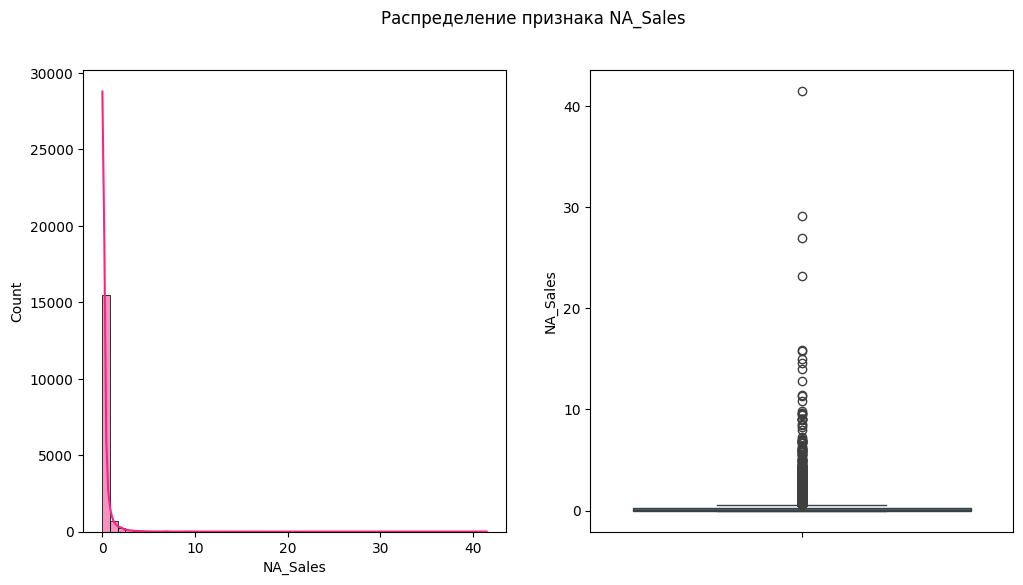

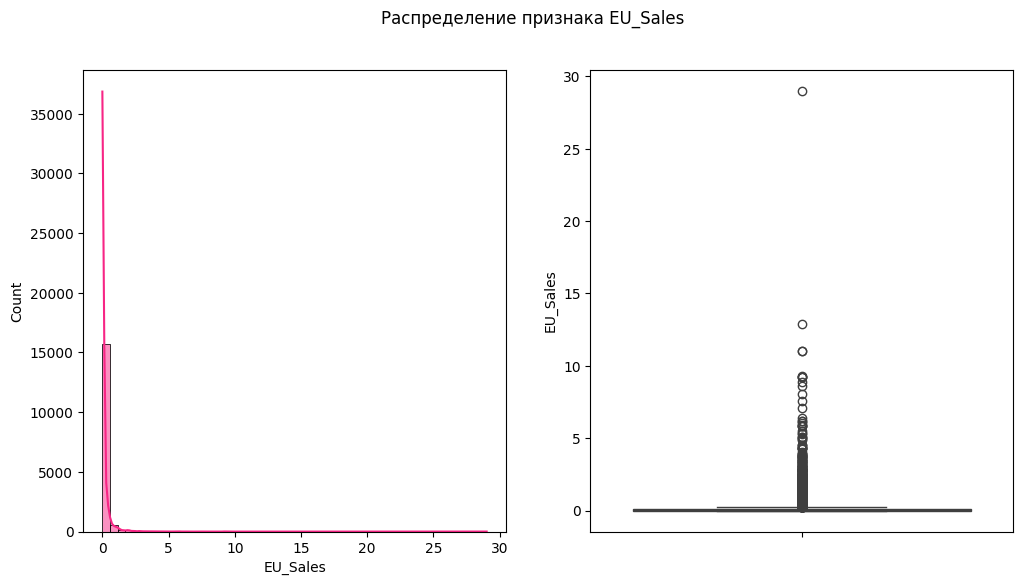

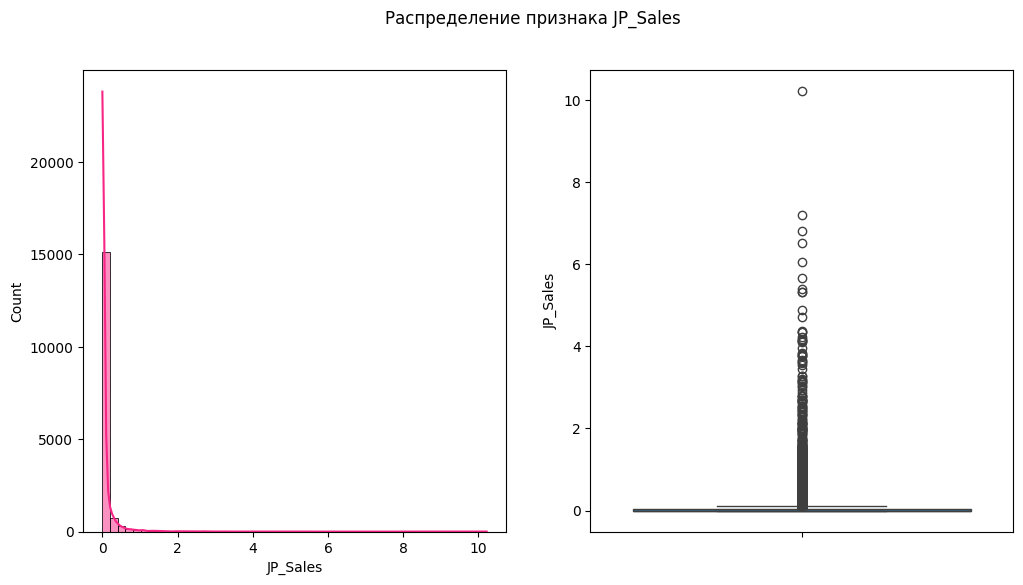

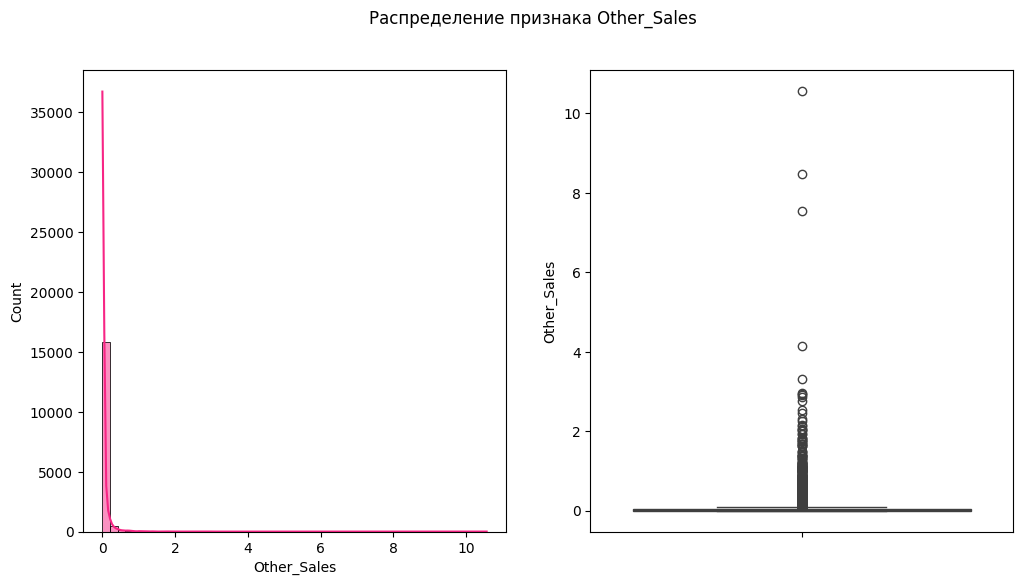

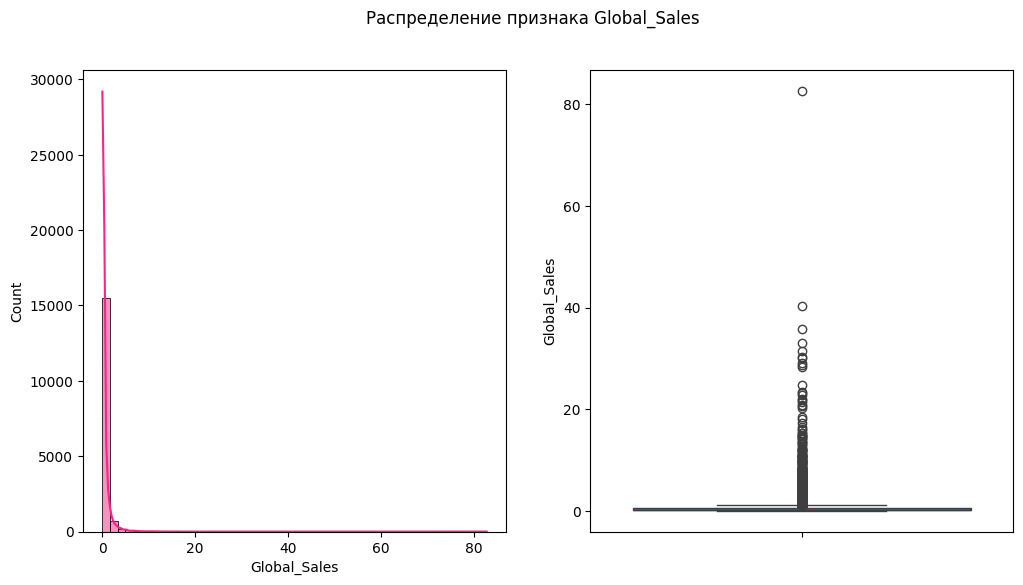

In [8]:
for col_name in dataset.select_dtypes(np.number):
    distribution_plot(col_name)

По графикам видно, что все числовые признаки имеют распределение, сильно скошенное вправо (из-за большого кол-ва выбросов сверху).

### Анализ категориальных данных

In [9]:
dataset["Year"] = dataset["Year"].fillna(dataset["Year"].mode()[0])
dataset["Publisher"] = dataset["Publisher"].fillna(dataset["Publisher"].mode()[0])

dataset["Year"] = dataset["Year"].astype(int)
dataset["Year"] = dataset["Year"].astype(object)

In [10]:
def get_barplot(col_name):
    feature = dataset[col_name]
    if len(feature.unique()) > 30:
        feature = feature.value_counts().nlargest(30)

    plt.figure(figsize=(14, 14))
    sns.barplot(feature, palette="magma")
    plt.xticks(rotation=90) 
    plt.title(f"Столбчатая диаграмма для признака: {col_name}")
    plt.show();

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2991605250.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(feature, palette="magma")


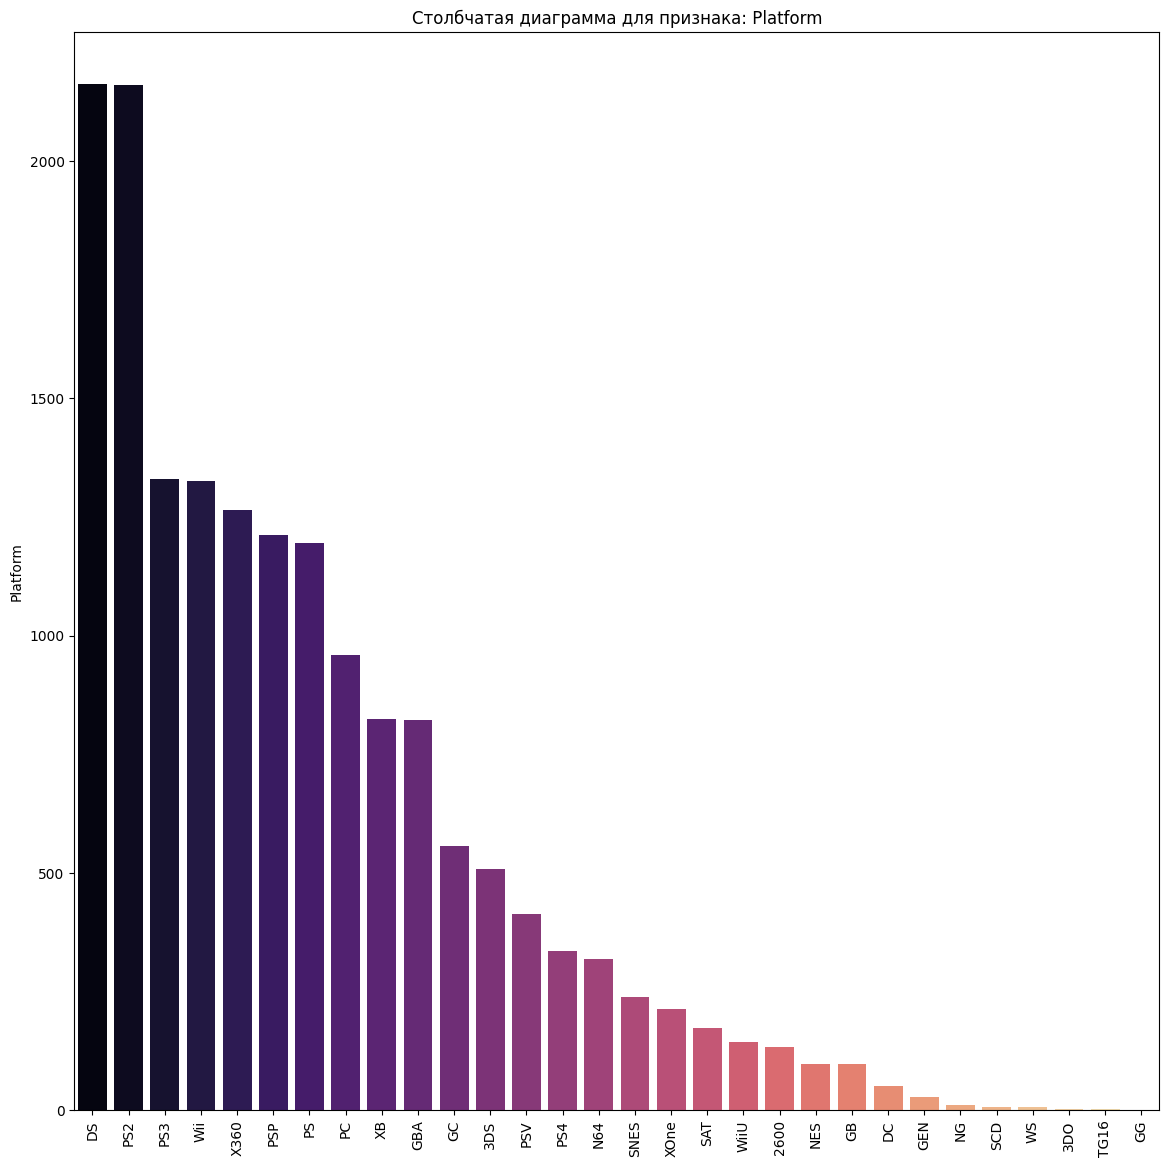

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2991605250.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(feature, palette="magma")


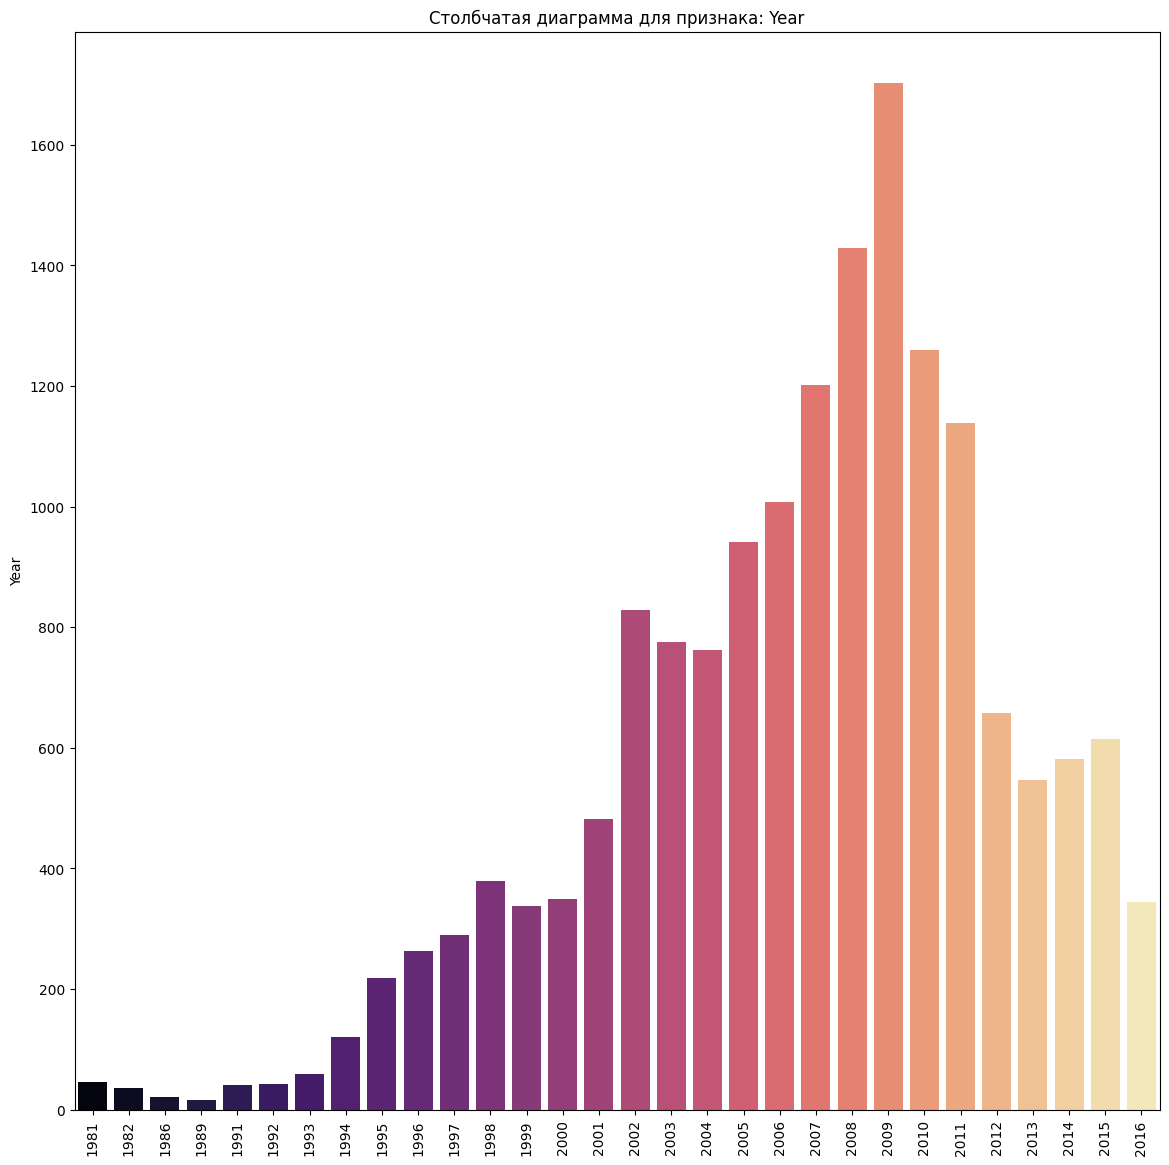

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2991605250.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(feature, palette="magma")


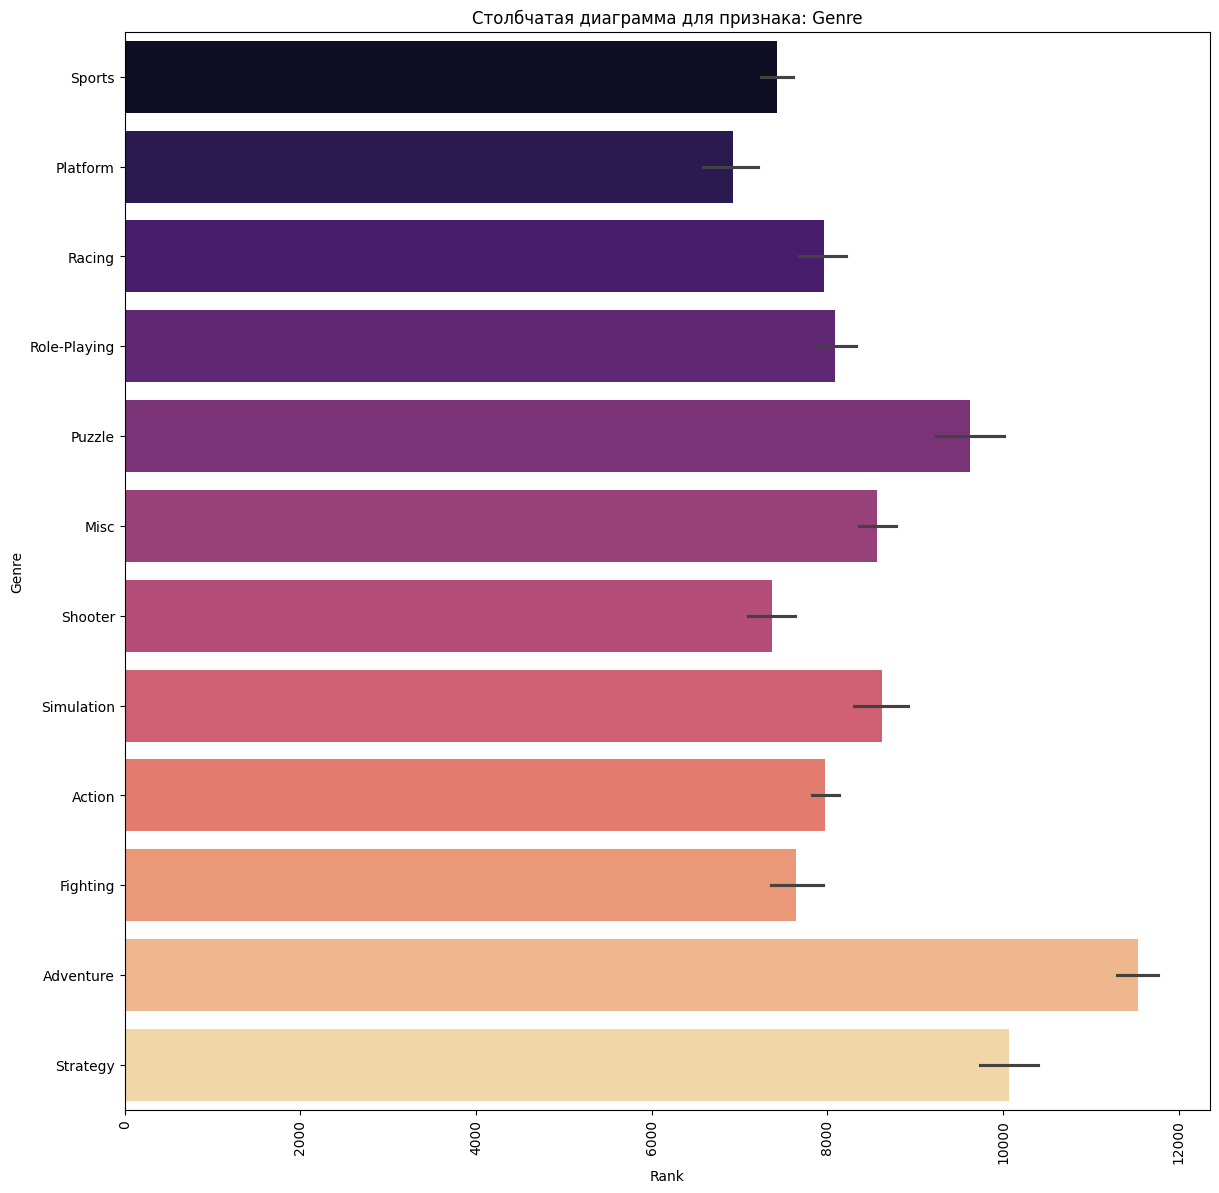

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2991605250.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(feature, palette="magma")


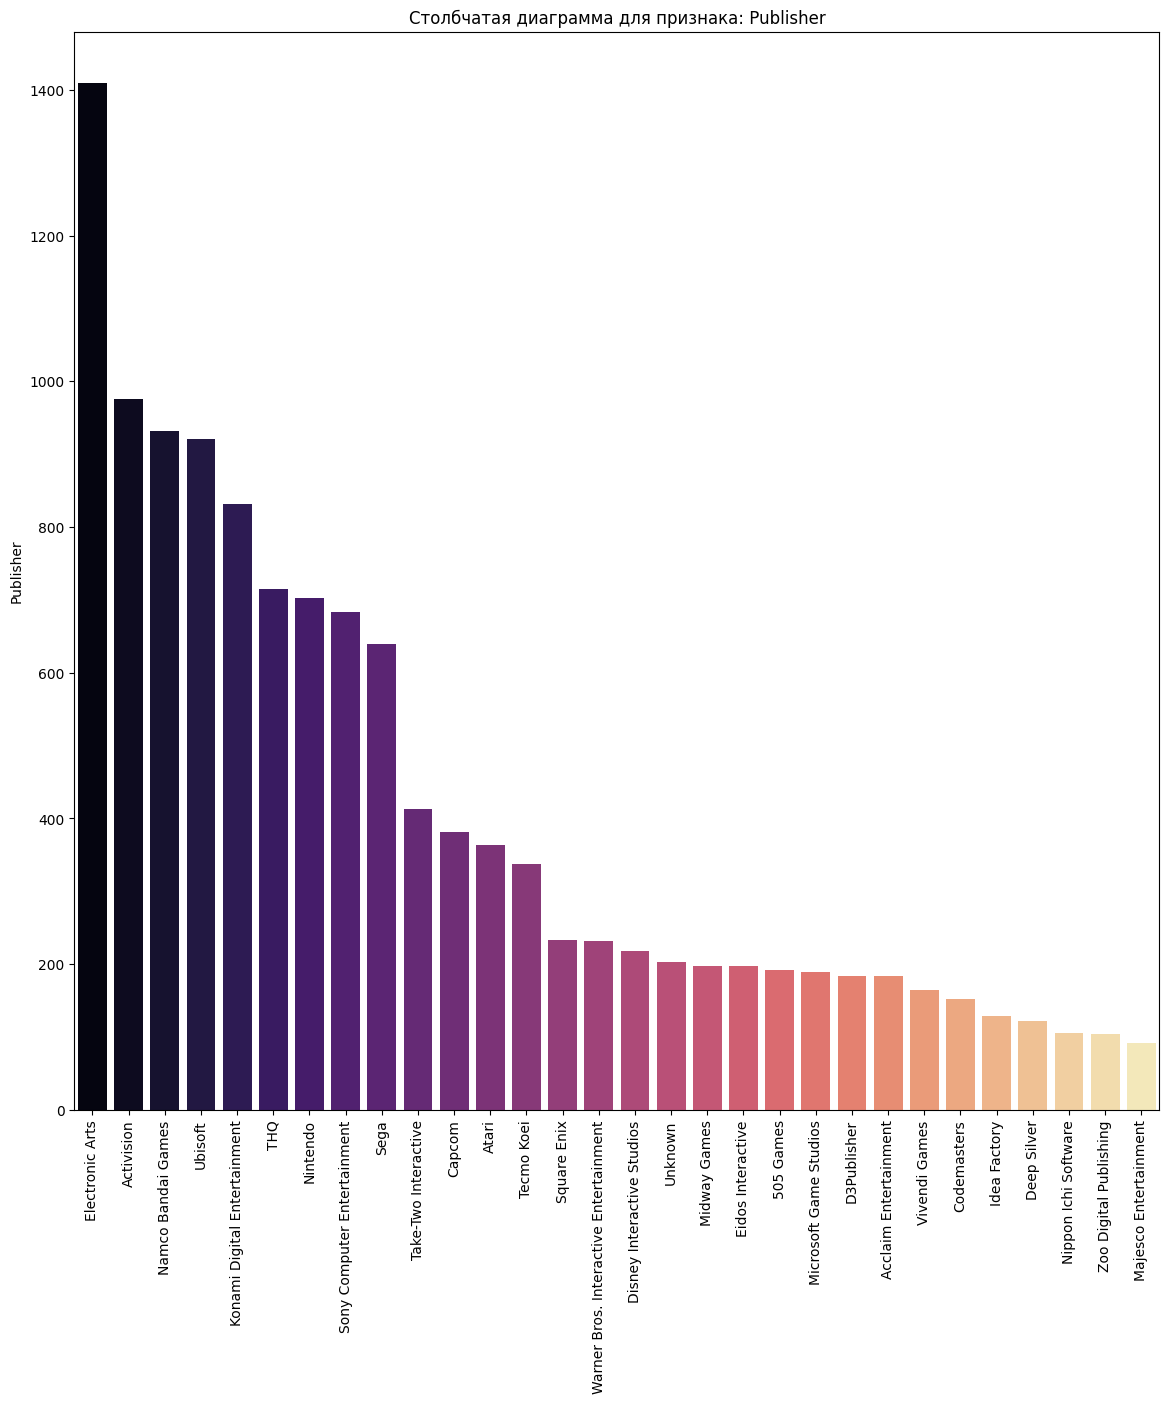

In [11]:
for col_name in dataset.select_dtypes(object).iloc[:, 1:]:
    get_barplot(col_name)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16598 non-null  object 
 3   Genre         16598 non-null  object 
 4   Publisher     16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


### Корреляция между числовыми признаками

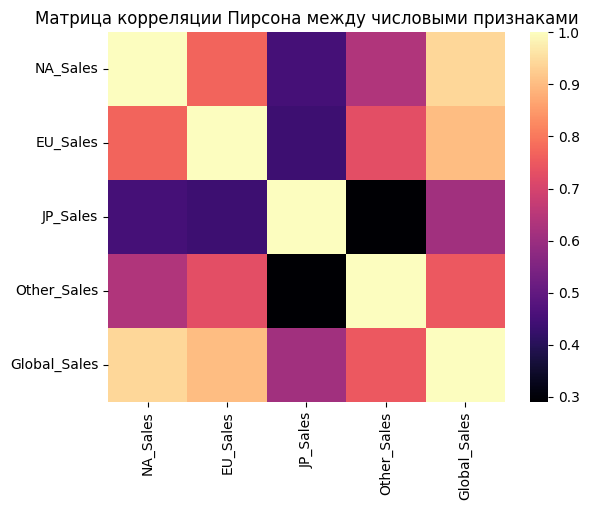

In [13]:
sns.heatmap(dataset.select_dtypes(np.number).corr(), cmap="magma")
plt.title("Матрица корреляции Пирсона между числовыми признаками")
plt.show()

Между собой сильно коррелируют: North America и Europe; Global Sales c North America и Europe (скорее всего, на них приходится большая часть продаж); Europe и Other World

In [14]:
def visual_jointplot(column_x, other_columns):
    length = len(other_columns)
    fig, axes = plt.subplots(1, length, figsize=(16, 6))

    for i in range(length):
        column_y = other_columns[i]
        dataset_filtered = dataset.drop_duplicates(subset=[column_x, column_y])

        sns.kdeplot(data=dataset_filtered, x=column_x, y=column_y, ax=axes[i], color="#F72585")
        
    fig.suptitle(f"Диаграмма рассеяности для {column_x}")
    plt.show()

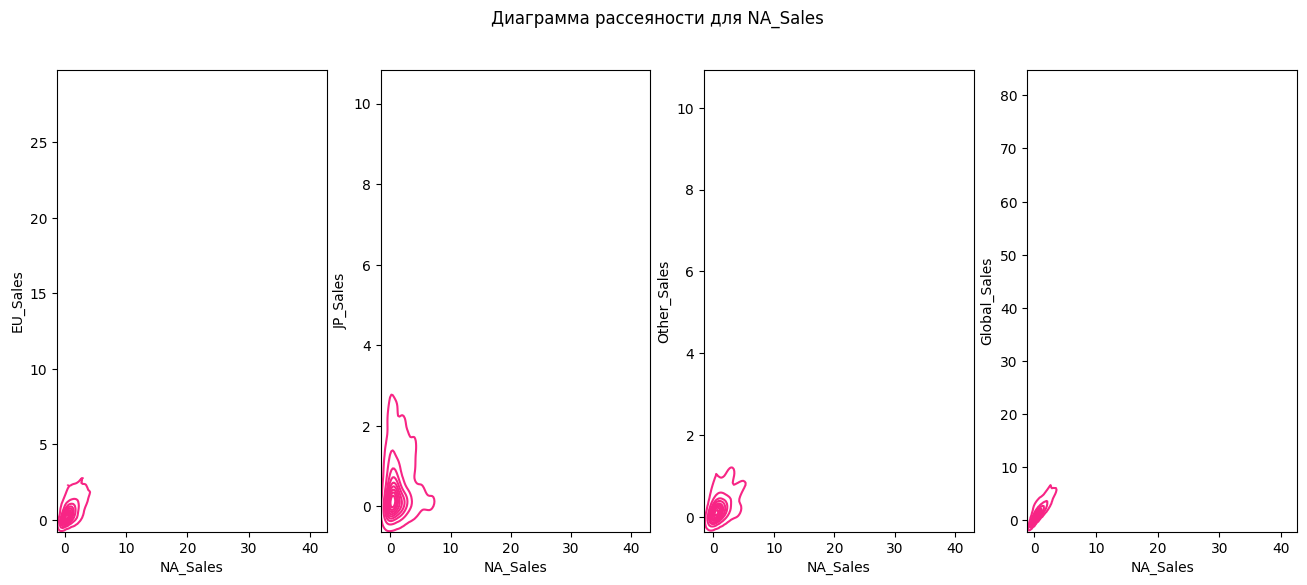

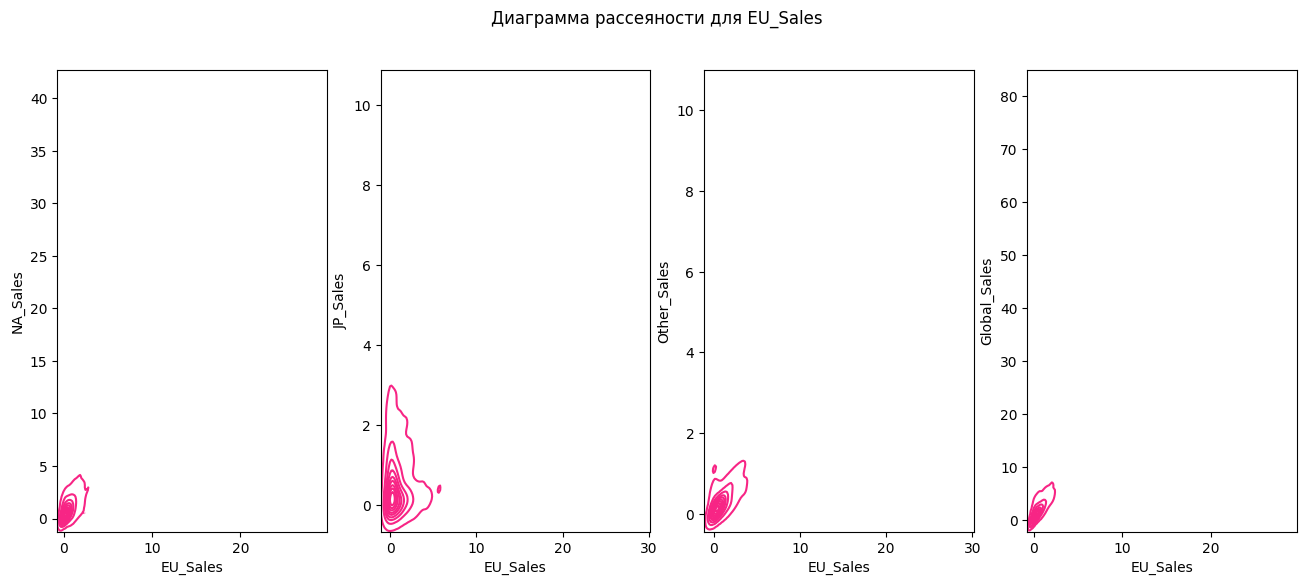

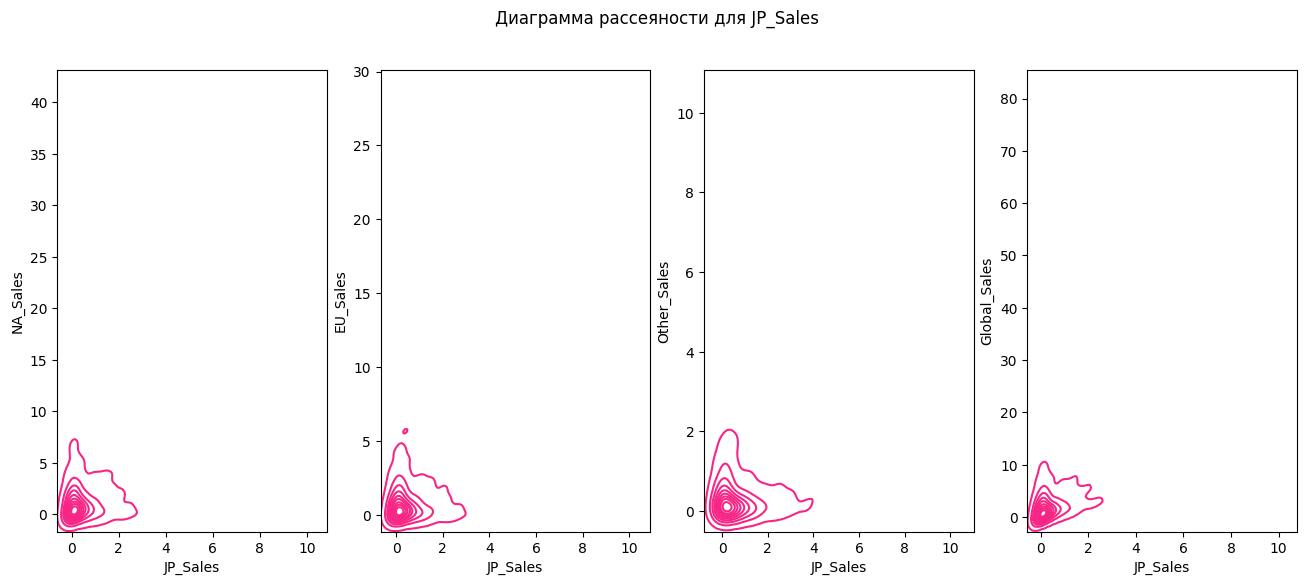

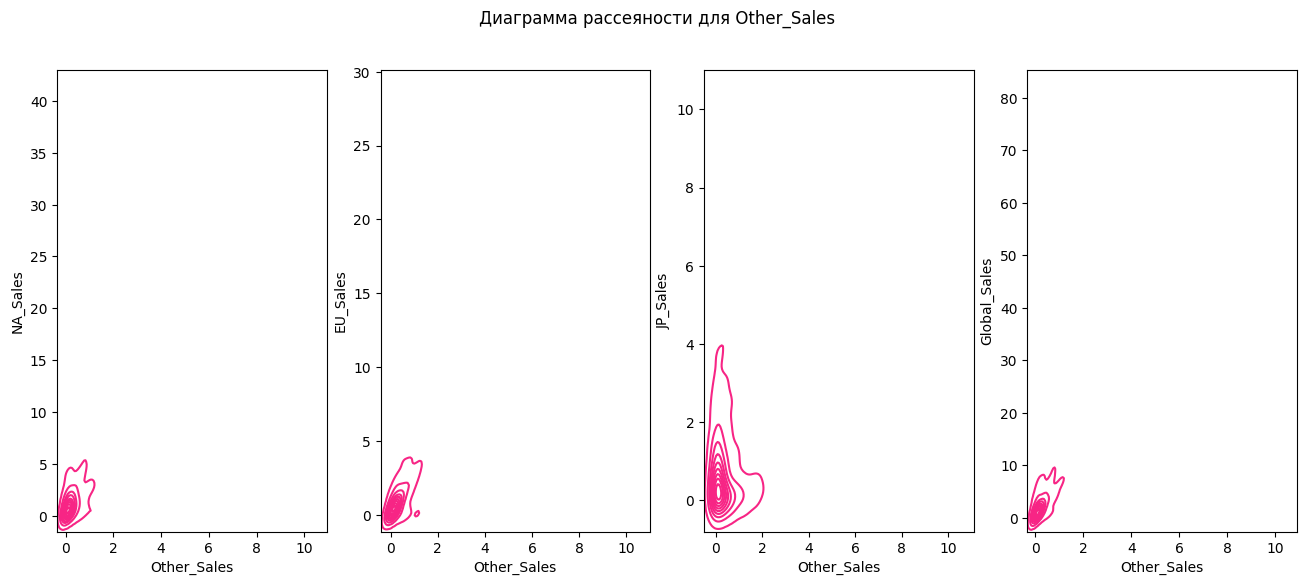

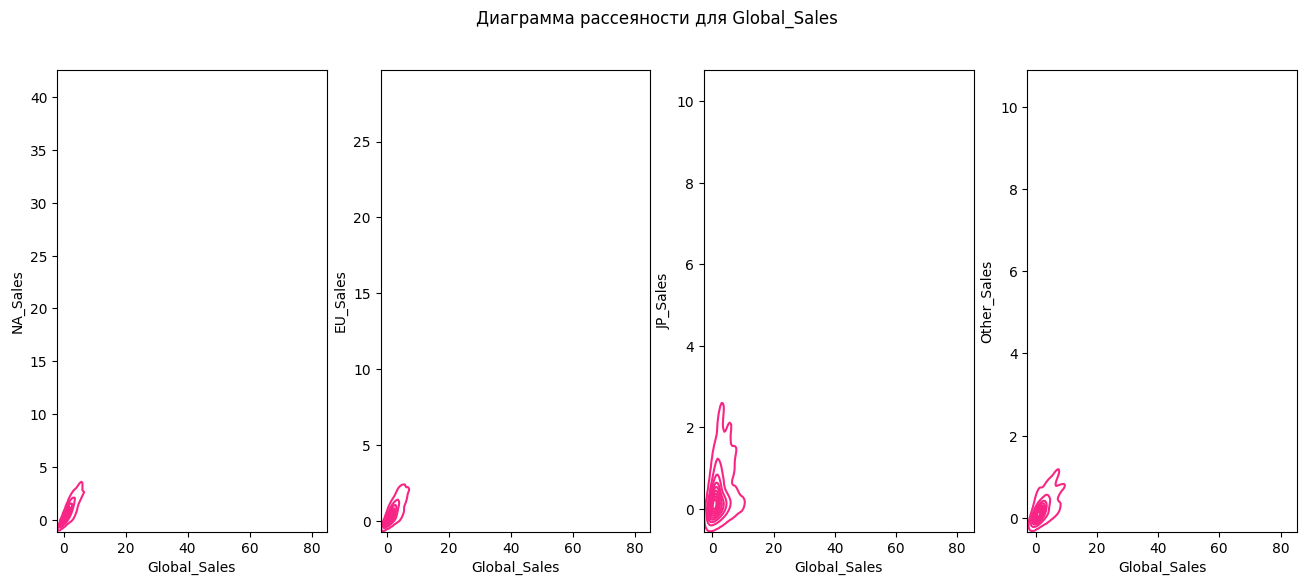

In [15]:
for column in dataset.select_dtypes(np.number):
    other_columns = dataset.select_dtypes(np.number).columns.to_list()
    other_columns.remove(column)

    visual_jointplot(column, other_columns)

Данные очень сильно "прибиты" к началу из-за скошенности, но в целом видно, что не сильное влияние на остальные продажи оказывает JP_Sales. Остальные же продажи прямо пропорциональны относительно друг друга.

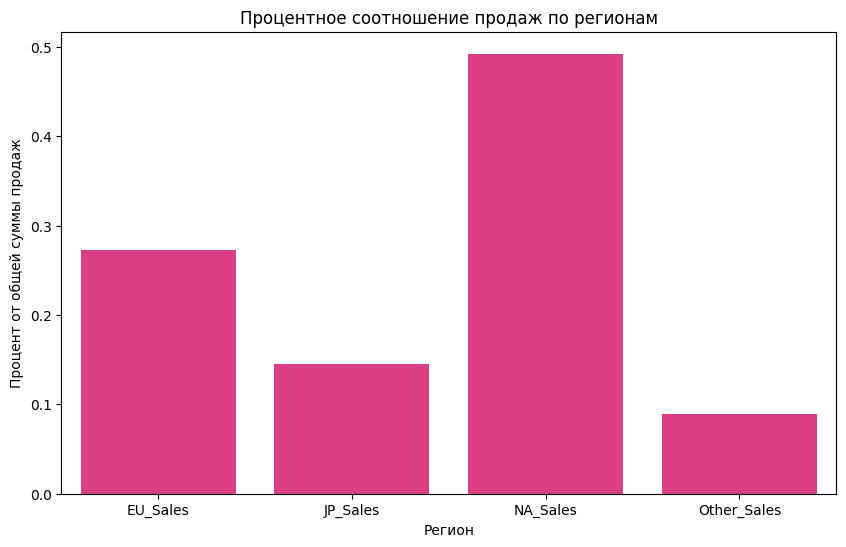

In [16]:
df_num = dataset.select_dtypes(np.number)


df_num_melted = df_num.melt(var_name='Category', value_name='Percentage')

df_num_sum = df_num_melted.groupby("Category").sum()

global_sales = df_num_sum.loc["Global_Sales"].values[0]

df_num_sum["Percentage"] = df_num_sum["Percentage"].apply(lambda x: x / global_sales)

df_num_sum = df_num_sum.drop(index="Global_Sales")

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Percentage', data=df_num_sum, color="#F72585")

# Добавление заголовка и подписи осей
plt.title('Процентное соотношение продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Процент от общей суммы продаж')

plt.show()

Большая часть продаж игр приходится на Северную Америку.

## Ответы на вопросы из ТЗ

### Общая динамика продаж по годам

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\4191721850.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_year = dataset.groupby("Year").sum()


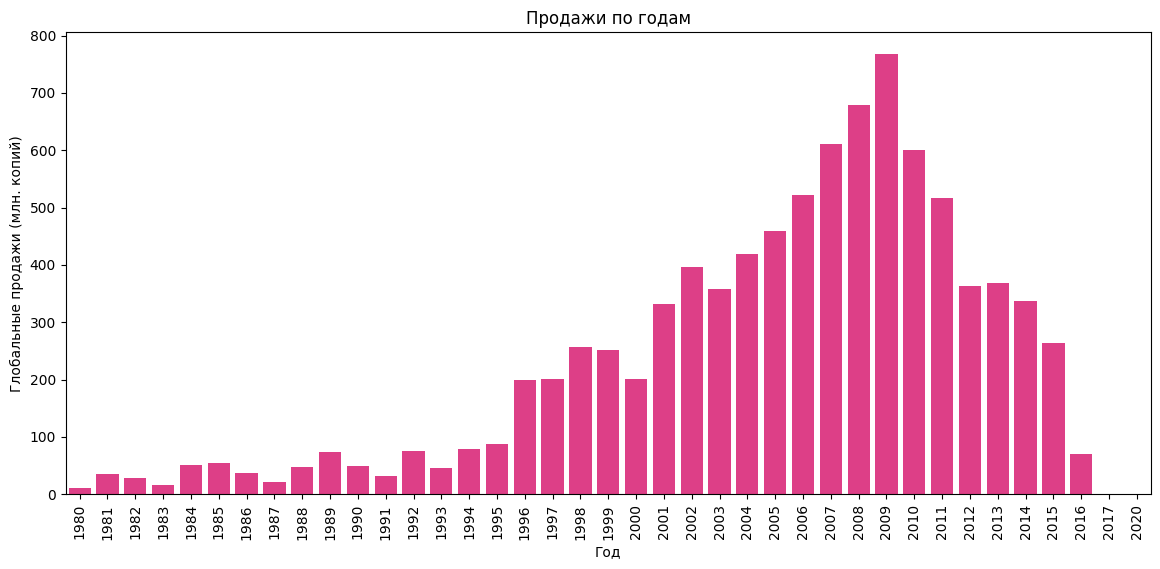

In [17]:
dataset_year = dataset.groupby("Year").sum()

plt.figure(figsize=(14, 6))
sns.barplot(data=dataset_year, x="Year", y="Global_Sales", color="#F72585")
plt.xticks(rotation=90)
plt.xlabel("Год")
plt.ylabel("Глобальные продажи (млн. копий)")
plt.title("Продажи по годам")
plt.show()

В 2000-е года был самый активный рост продаж видеоигр (почти в 4 раза). 2009 год - самые большие продажи. После 2009 года глобальные продажи пошли на спад и вернулись к уровню конца 1990-ых годов. 

<em>Начиная с 2017 года датасет содержит мало данных и последующие года были пропущены.</em>

#### Успешные платформы

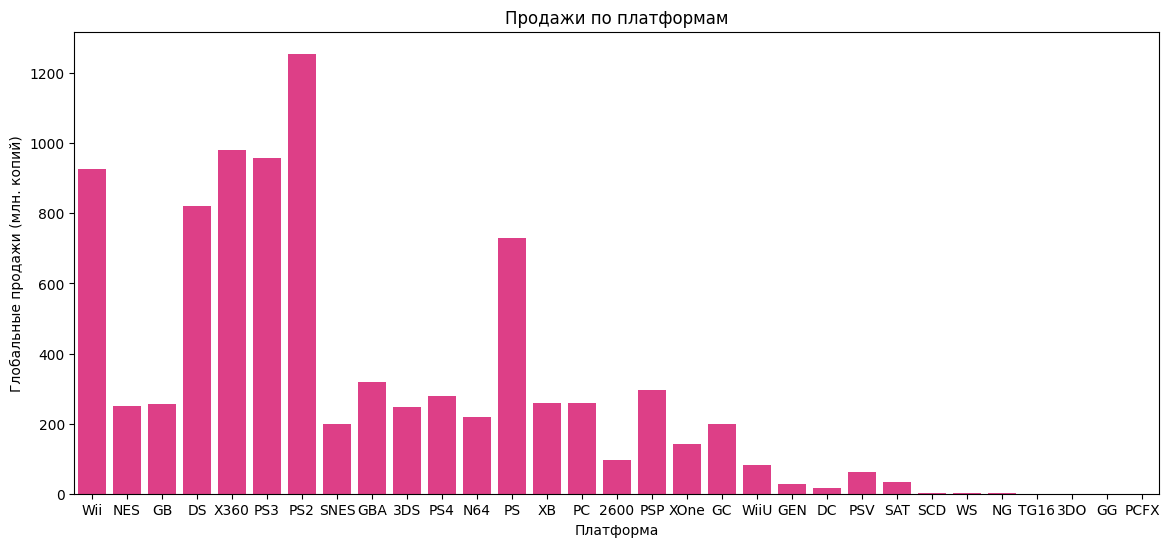

In [44]:
plt.figure(figsize=(14, 6))
sns.barplot(data=dataset, x="Platform", y="Global_Sales", estimator=np.sum, errorbar=('ci', False), color="#F72585")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи (млн. копий)")
plt.title("Продажи по платформам")
plt.show()

Из общего списка платформы выделяются следующие (по числу продаж):
* PS2
* X360
* PS3
* Wii
* DS
* PS

In [47]:
def visual_platform_by_year(platform: str):
    grouped_data = dataset.groupby(["Year", "Platform"]).sum()[["Global_Sales"]]

    filtered_data = grouped_data.loc[(slice(None), platform), :]

    plt.figure(figsize=(14, 6))
    sns.barplot(data=filtered_data, x="Year", y="Global_Sales", color="#F72585")
    plt.xlabel("Год")
    plt.ylabel("Глобальные продажи (млн. копий)")
    plt.title(f"Продажи по годам для платформы: {platform}")
    plt.show()

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1388310985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Platform"]).mean()[["Global_Sales"]]


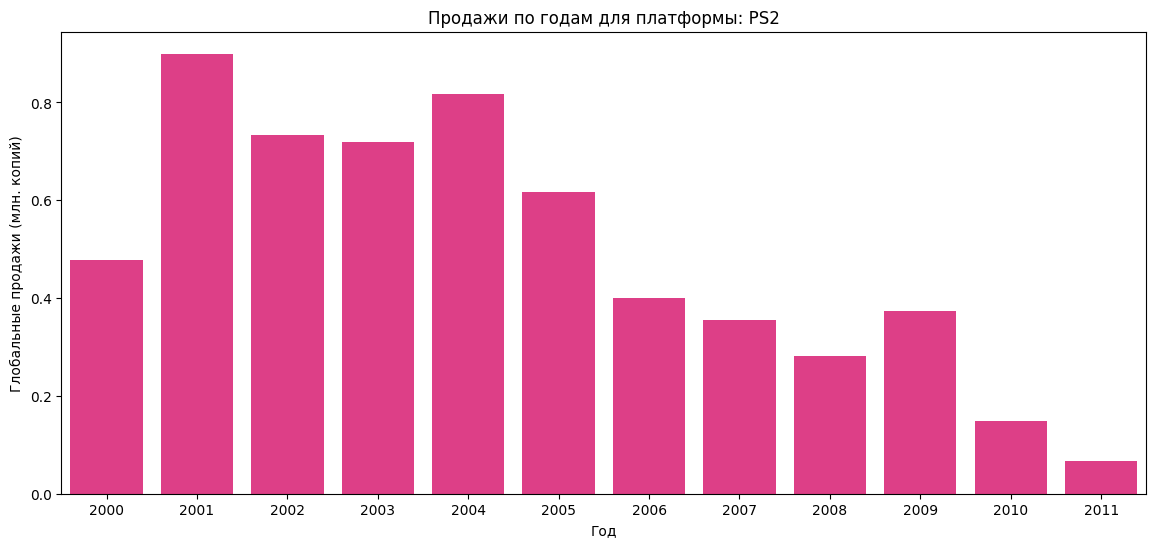

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1388310985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Platform"]).mean()[["Global_Sales"]]


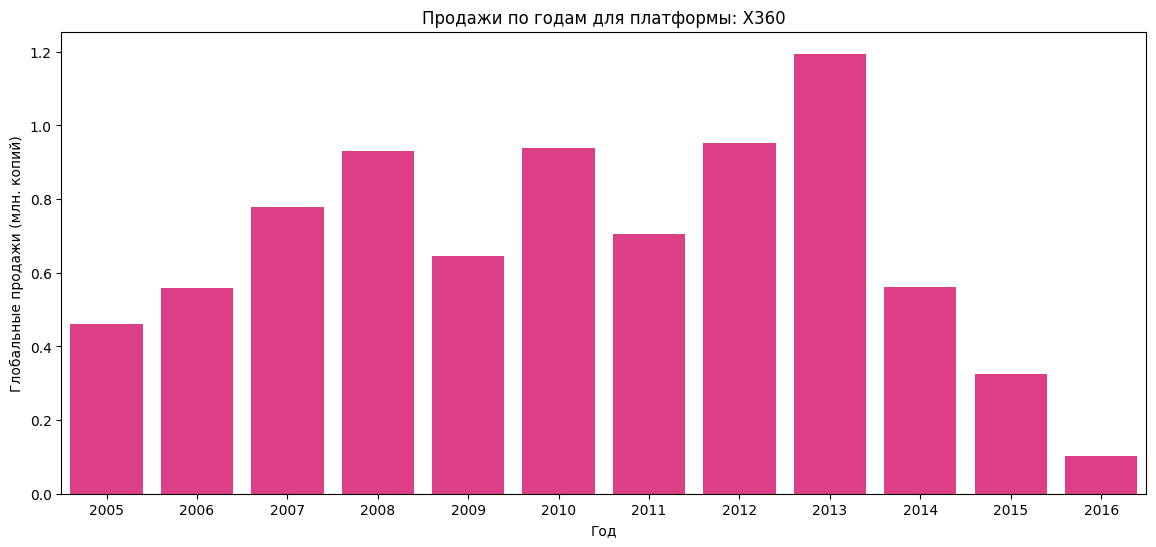

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1388310985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Platform"]).mean()[["Global_Sales"]]


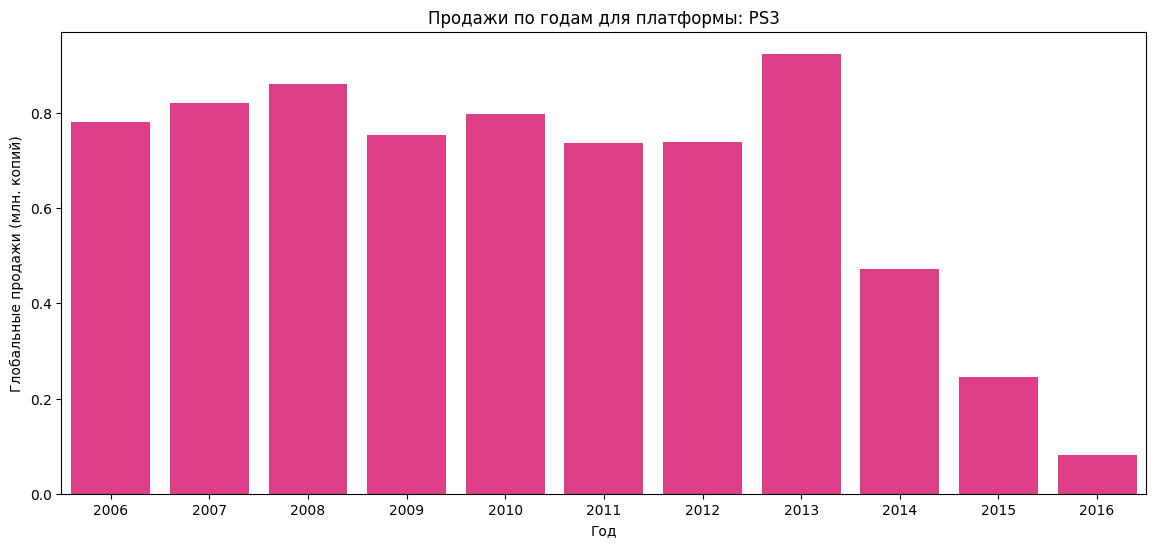

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1388310985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Platform"]).mean()[["Global_Sales"]]


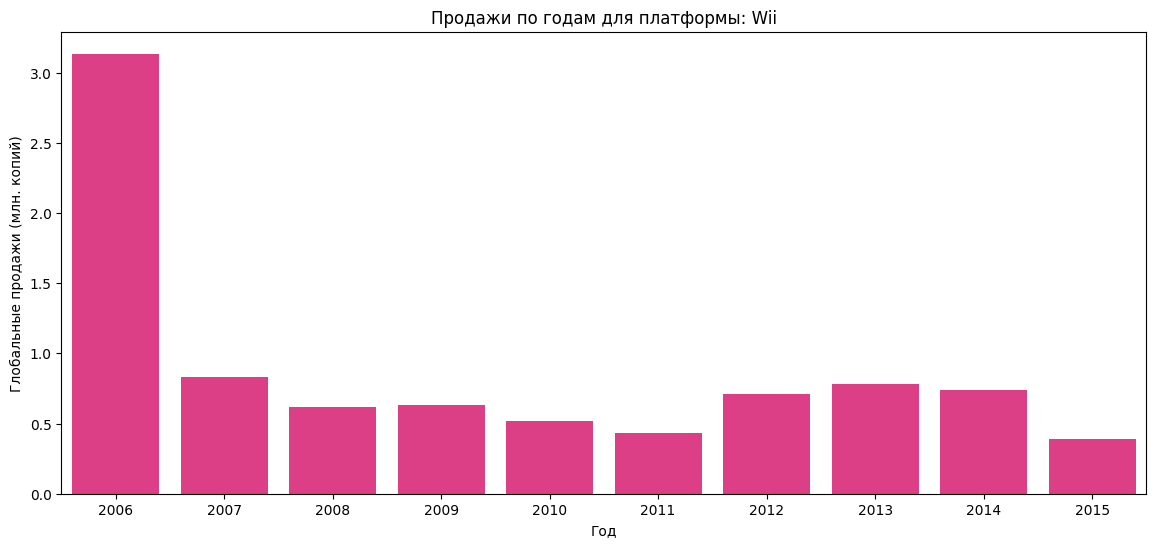

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1388310985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Platform"]).mean()[["Global_Sales"]]


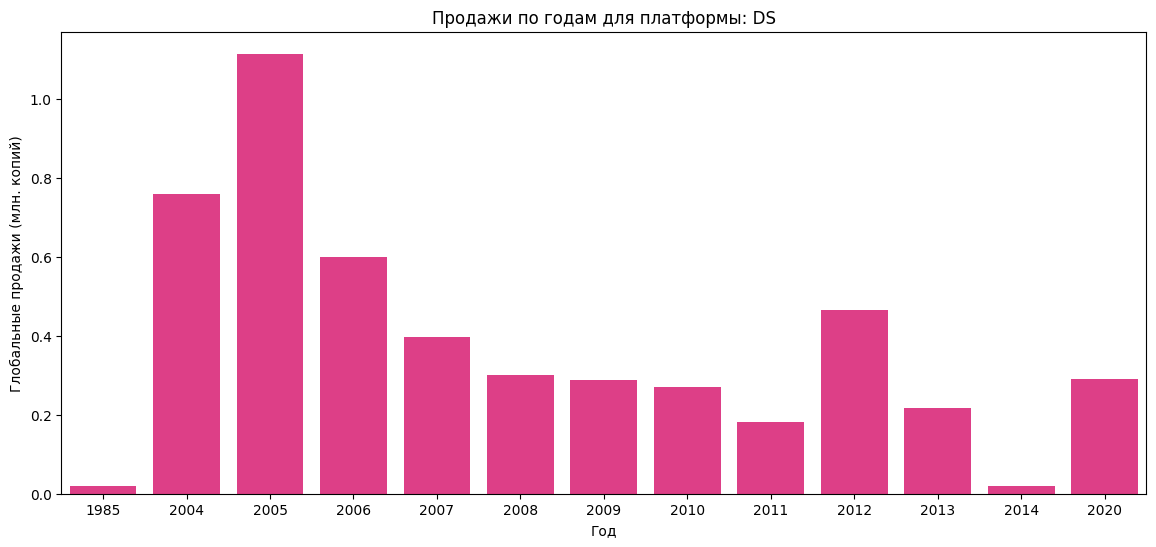

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1388310985.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Platform"]).mean()[["Global_Sales"]]


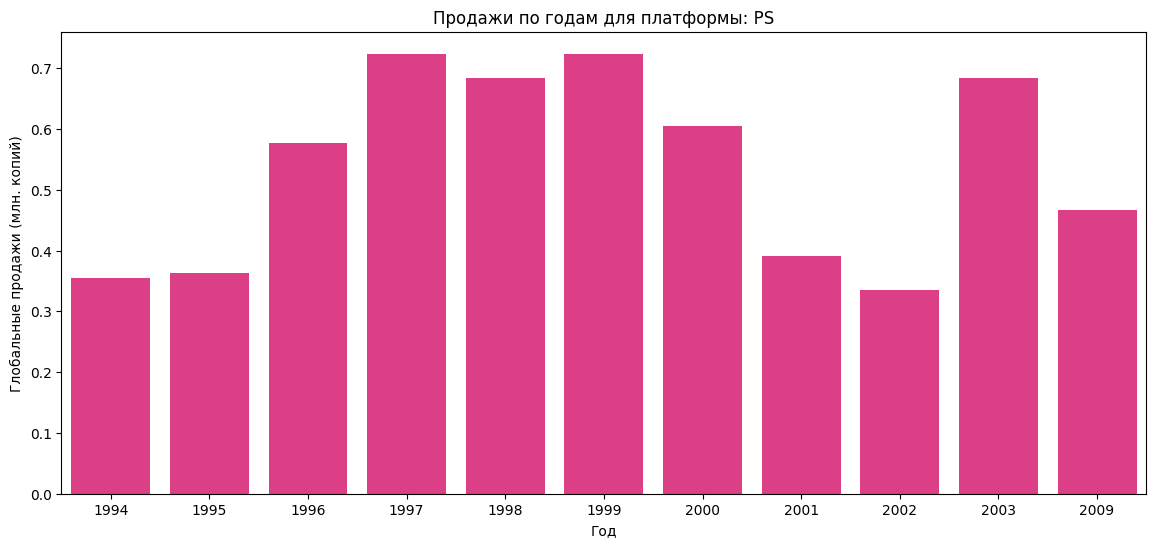

In [46]:
for platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]:
    visual_platform_by_year(platform)

Самые успешные года по продажам (около 100 и более млн. копий):
* PS2 — 2001-2006
* X360 — 2007-2013
* PS3 — 2008-2013
* Wii — 2006-2010
* DS — 2005-2009
* PS — 1996-2000

Популярность платформ в эти года явно связана с общим ростом популярности на видеоигры во всём мире.

#### Успешные жанры

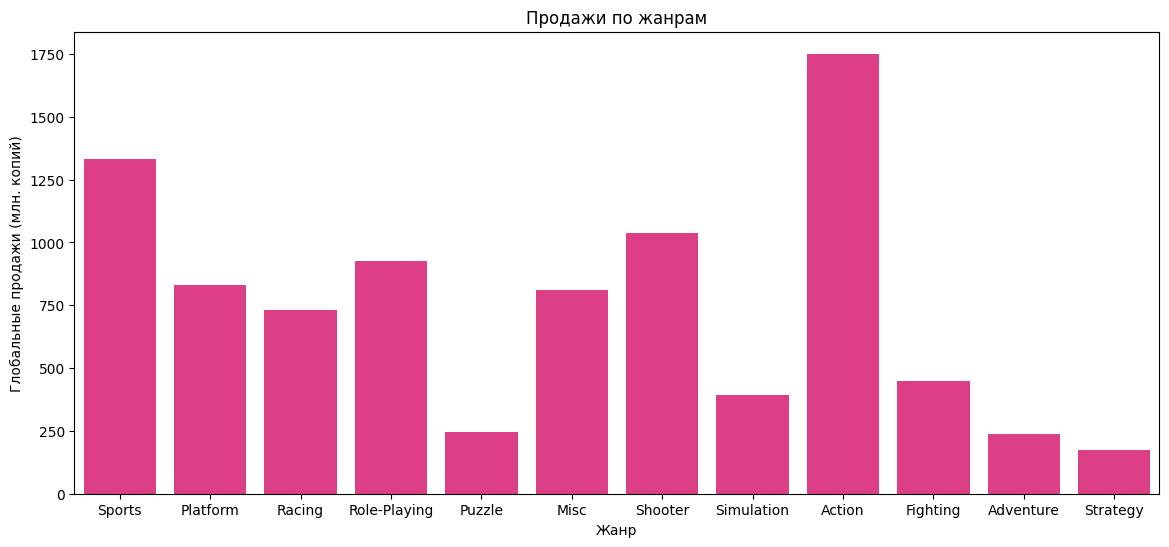

In [21]:
plt.figure(figsize=(14, 6))
sns.barplot(data=dataset, x="Genre", y="Global_Sales", estimator=np.sum, errorbar=('ci', False), color="#F72585")
plt.xlabel("Жанр")
plt.ylabel("Глобальные продажи (млн. копий)")
plt.title("Продажи по жанрам")
plt.show()

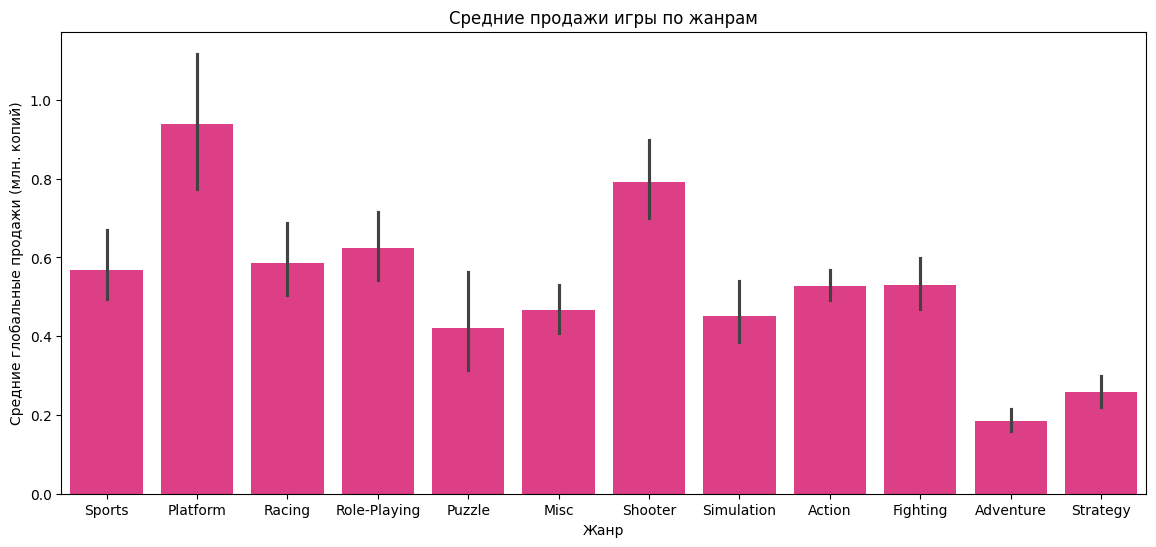

In [22]:
plt.figure(figsize=(14, 6))
sns.barplot(data=dataset, x="Genre", y="Global_Sales", color="#F72585")
plt.xlabel("Жанр")
plt.ylabel("Средние глобальные продажи (млн. копий)")
plt.title("Средние продажи игры по жанрам")
plt.show()

Популярные жанры на всём промежутке времени:
* Action
* Sports
* Shooter
* Role-Playing
* Platform
* Misc

In [50]:
def visual_genre_by_year(genre: str):
    grouped_data = dataset.groupby(["Year", "Genre"]).sum()[["Global_Sales"]]

    filtered_data = grouped_data.loc[(slice(None), genre), :]

    plt.figure(figsize=(14, 5))
    sns.barplot(data=filtered_data, x="Year", y="Global_Sales", color="#F72585")
    plt.xlabel("Год")
    plt.ylabel("Глобальные продажи (млн. копий)")
    plt.title(f"Продажи по годам для жанра: {genre}")
    plt.xticks(rotation=90)
    plt.show()

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


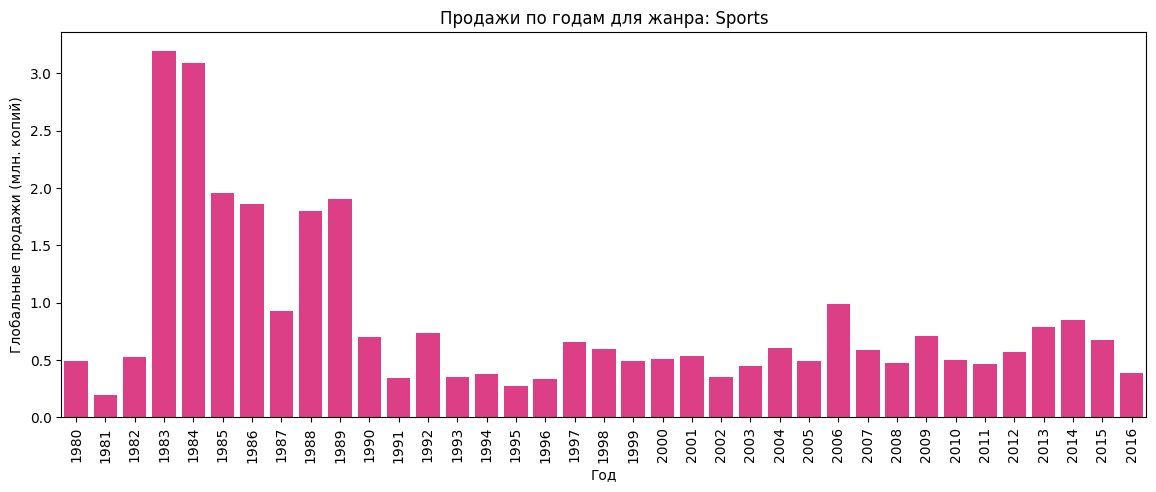

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


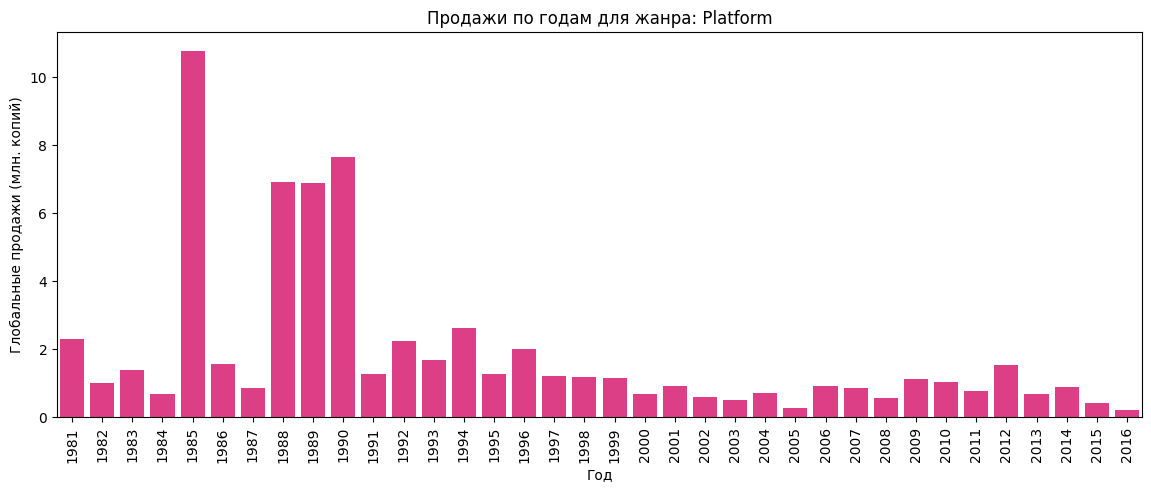

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


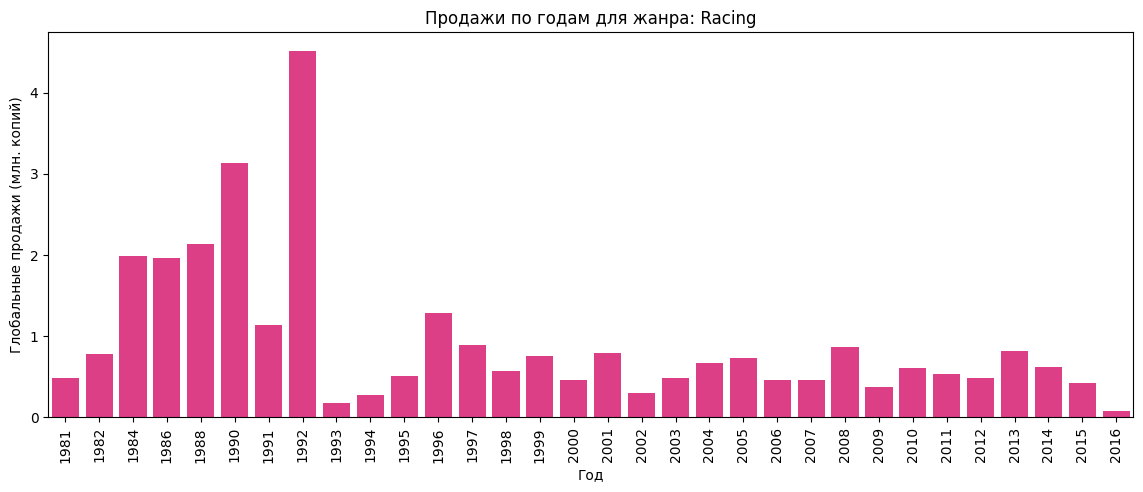

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


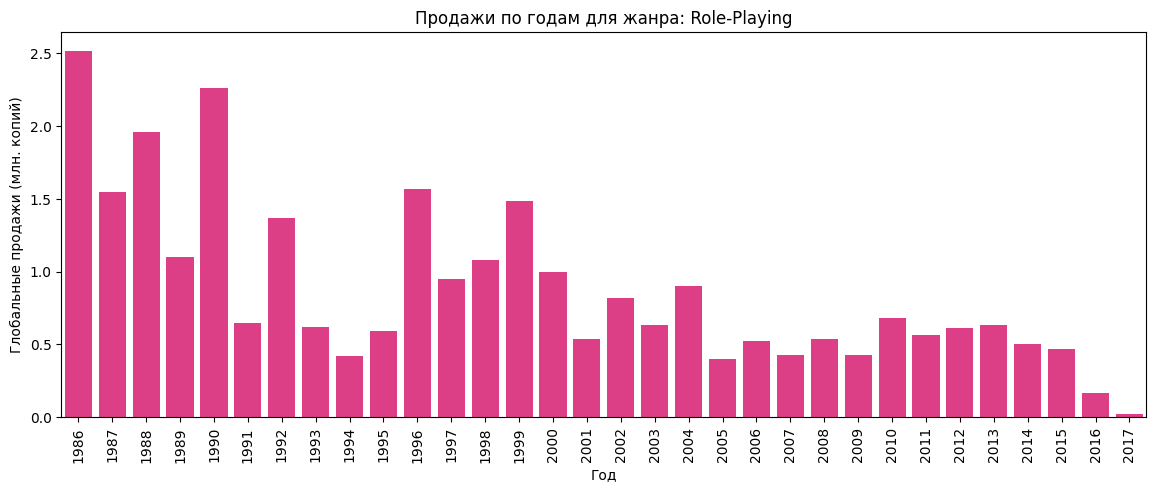

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


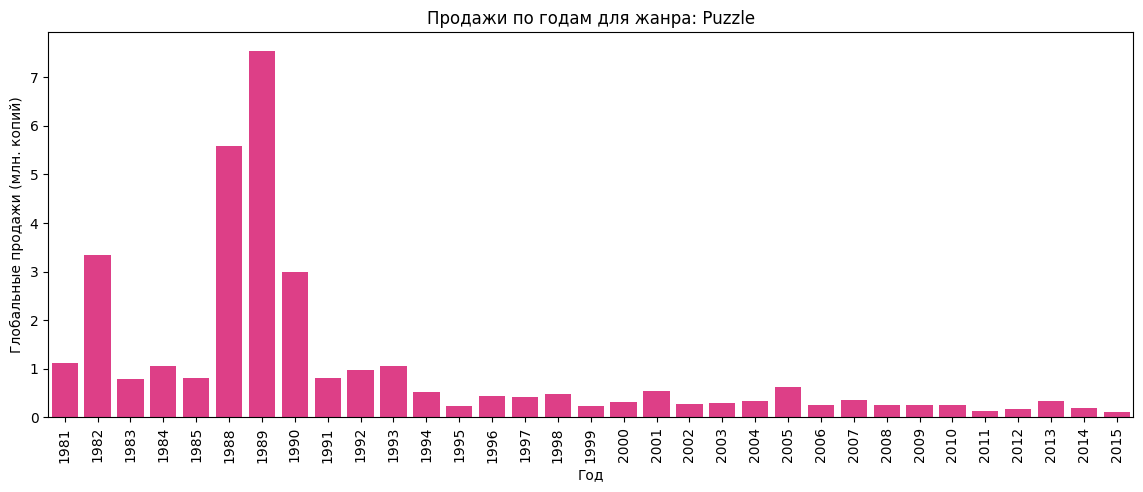

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


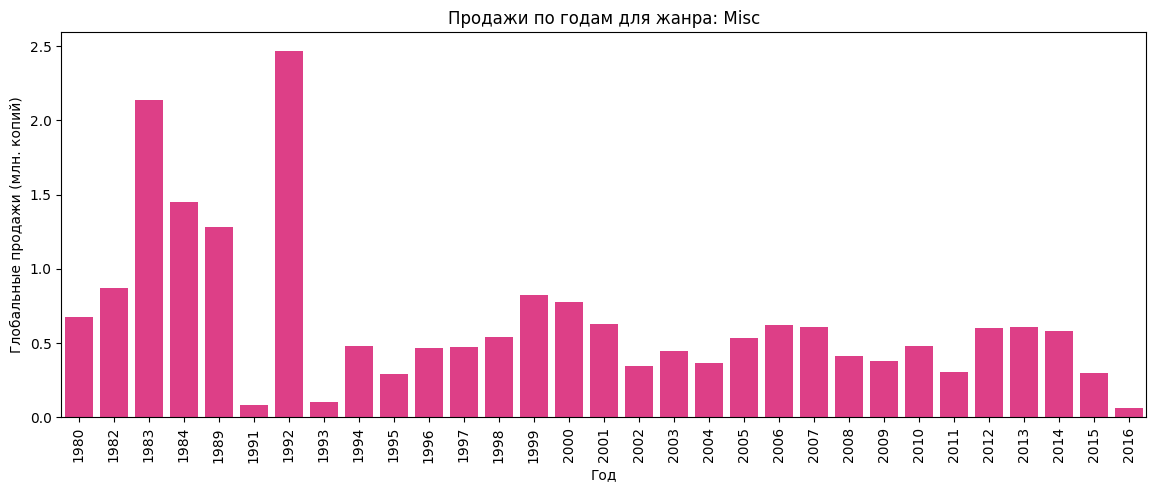

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


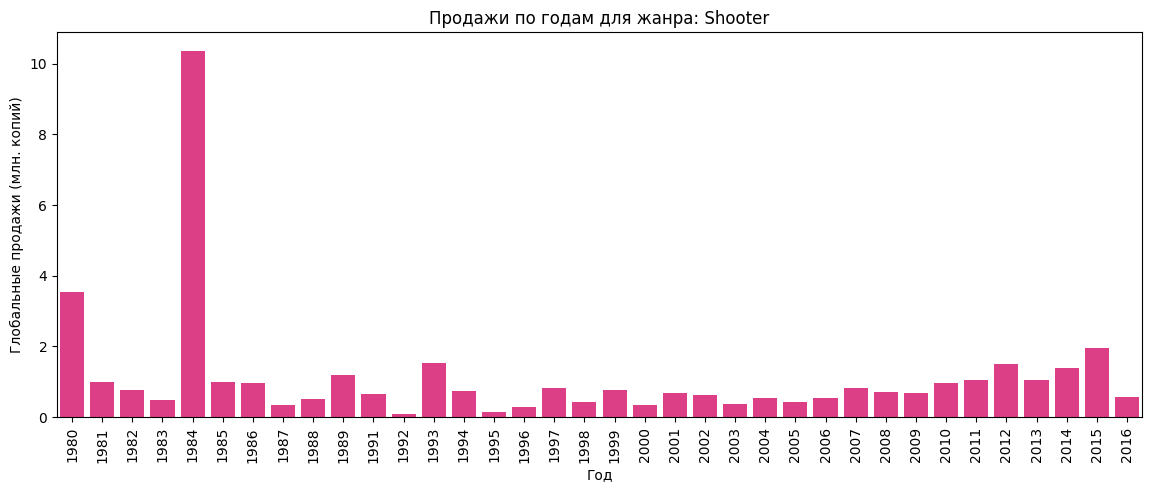

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


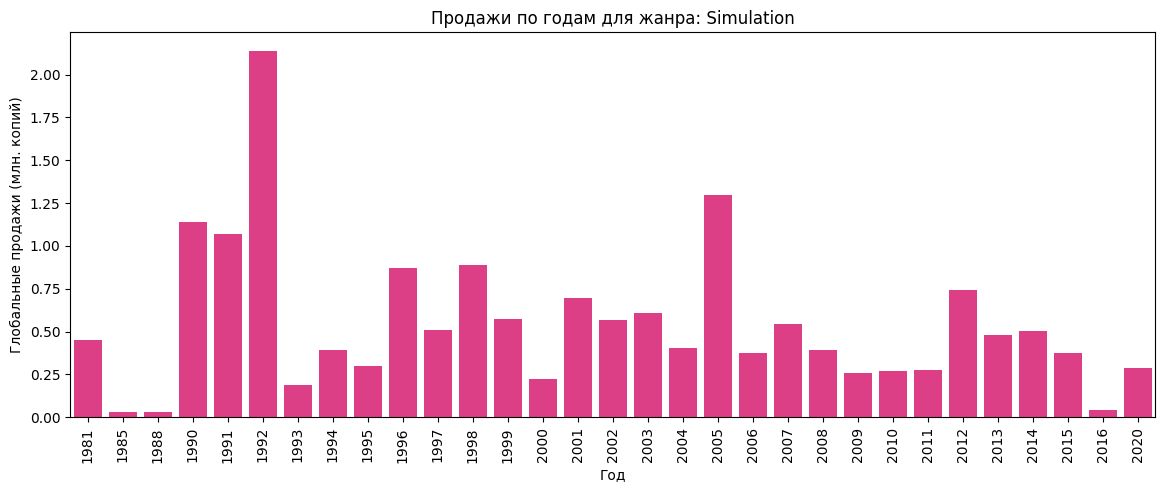

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


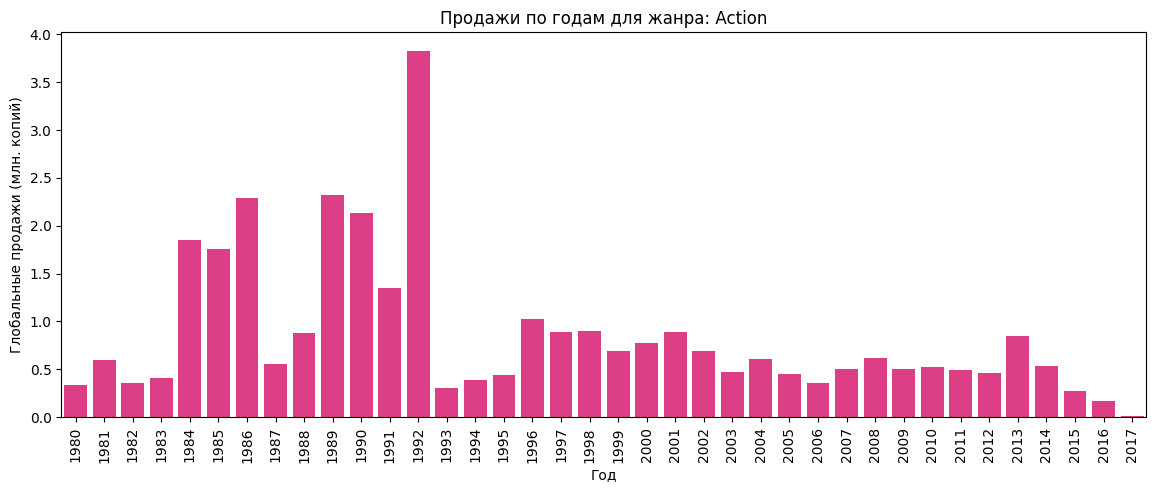

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


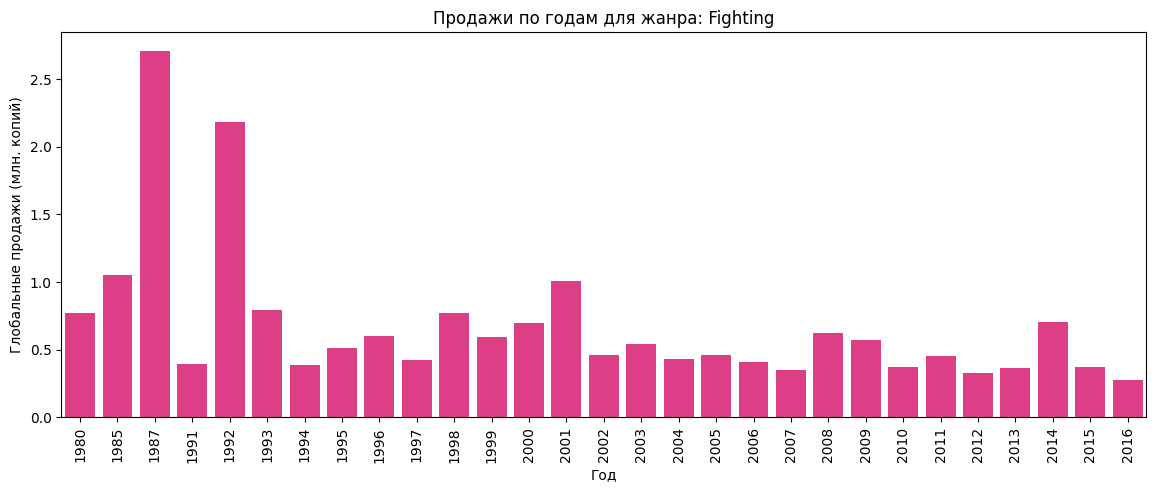

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


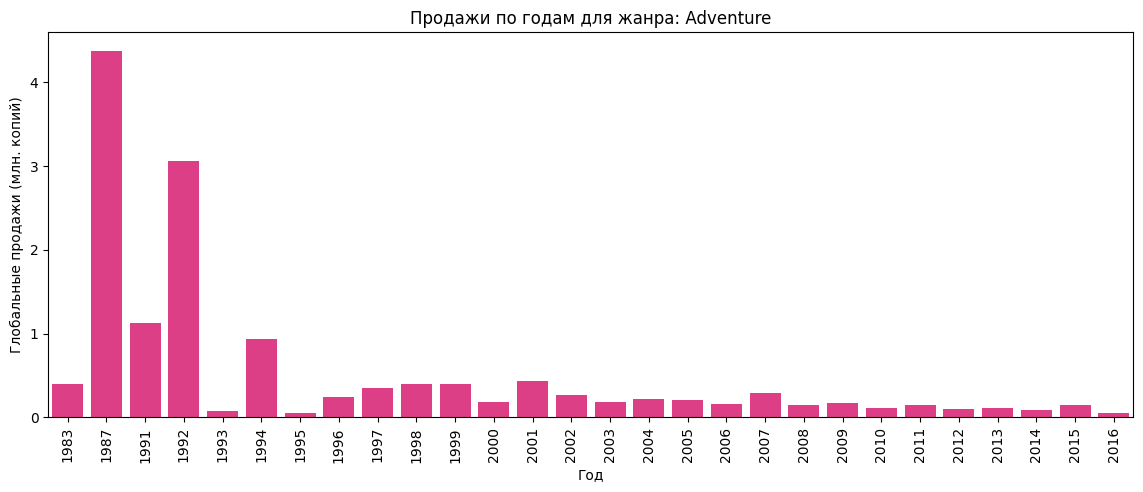

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\2004837620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(["Year", "Genre"]).mean()[["Global_Sales"]]


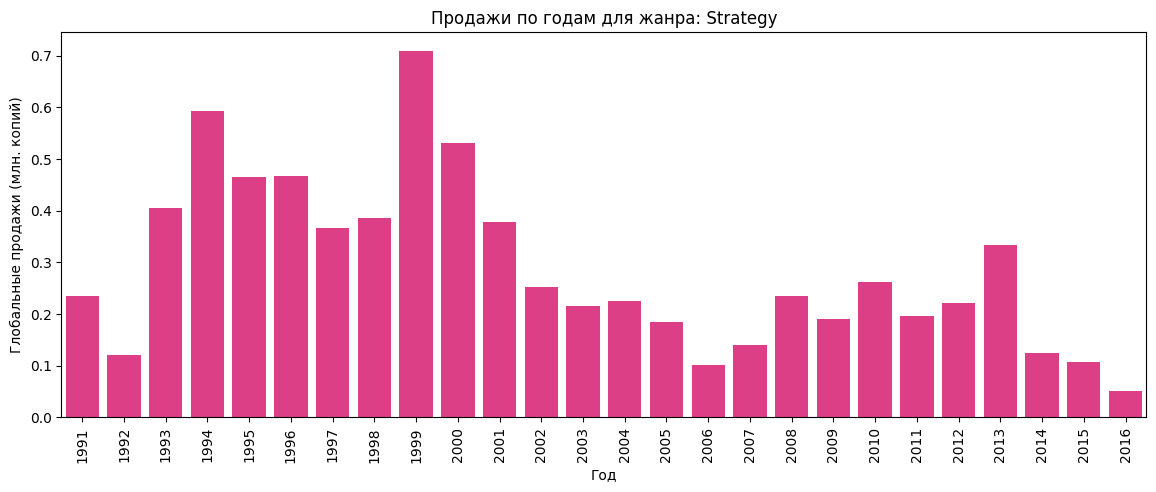

In [49]:
for genre in dataset["Genre"].unique():
    visual_genre_by_year(genre)

Все жанры были особенно популярны в промежутке между (2007-2011). После этого наблюдается активный спад популярности также у всех жанров. Это также указывает на то, что жанры имели какую-то общую тенденцию к росту/падению на определённых промежутках времени.

Начался активный рост популярность в начале 2000-ых у следующих жанров:
* Sports
* Shooter
* Action
* Misc
* Simulation

### Динамика продаж по регионам

#### Продажи по годам

In [25]:
def visual_region_sales_by_year(region: str):

    dataset_year = dataset.groupby("Year").sum()

    plt.figure(figsize=(14, 6))
    sns.barplot(data=dataset_year, x="Year", y=region, color="#F72585")
    plt.xticks(rotation=90)
    plt.xlabel("Год")
    plt.ylabel("Продажи (млн. копий)")
    plt.title(f"Продажи по годам в {region}")
    plt.show()

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\3871152350.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_year = dataset.groupby("Year").sum()


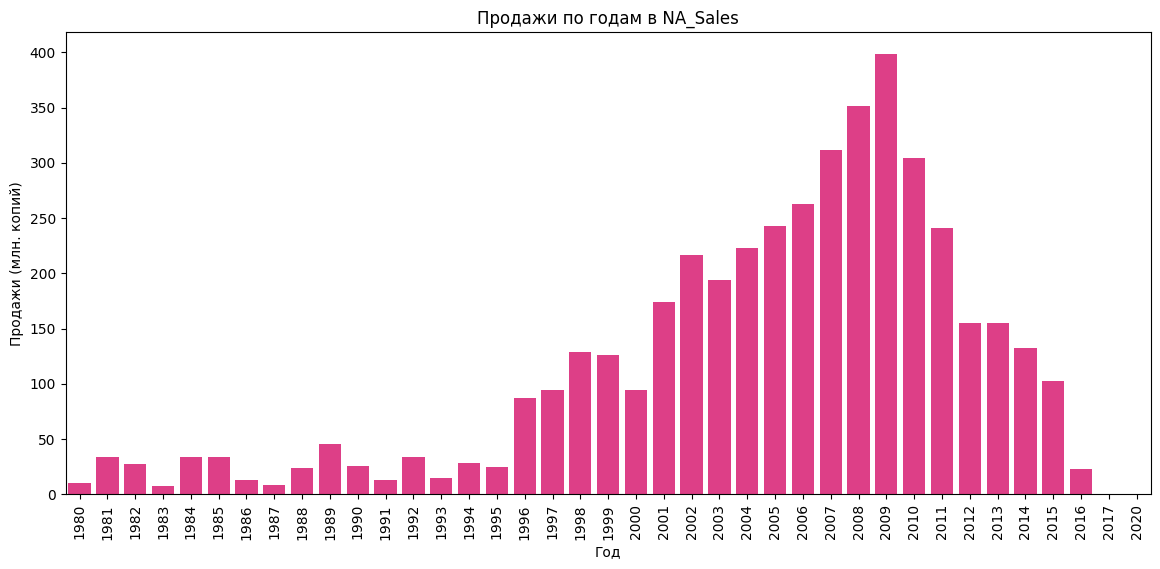

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\3871152350.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_year = dataset.groupby("Year").sum()


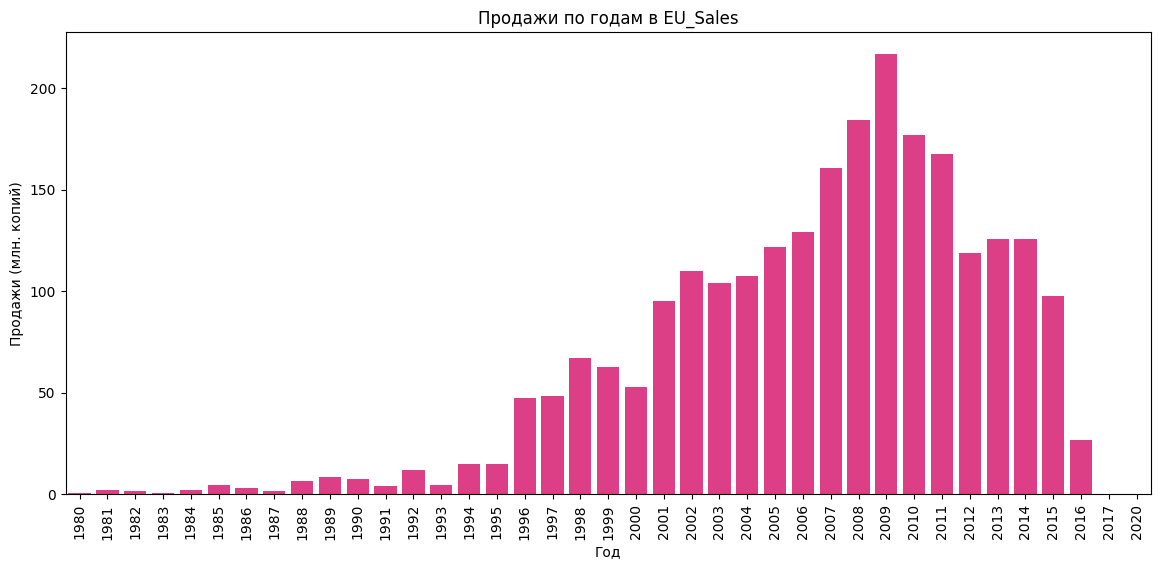

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\3871152350.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_year = dataset.groupby("Year").sum()


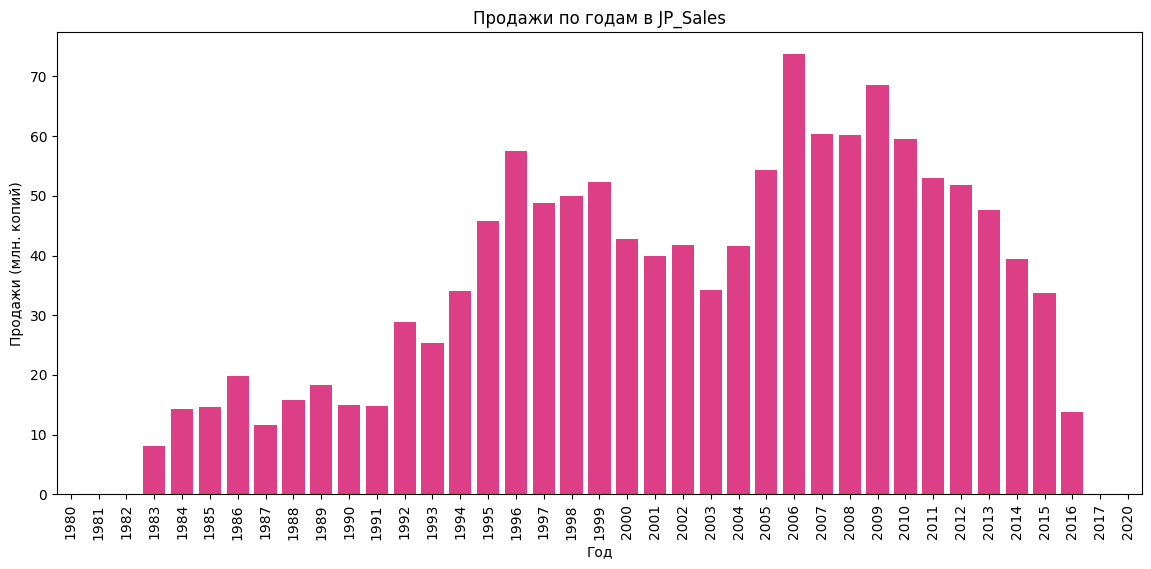

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\3871152350.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_year = dataset.groupby("Year").sum()


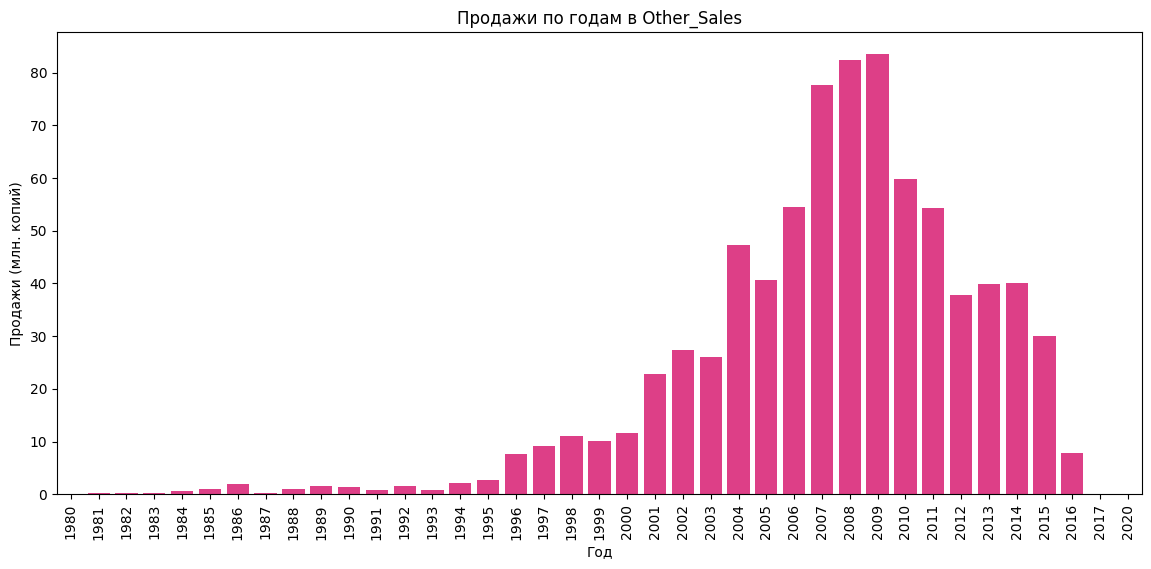

In [26]:
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

for region in regions:
    visual_region_sales_by_year(region)

Интерес к видеоиграм начал расти с середины 1990-ых в Северной Америке и Европе; с начала 1990-ых в Японии; с начала 2000-ых в остальном мире (что можно объяснить технологическим "отставанием" других стран).

#### Успешные платформы

In [27]:
def visual_region_sales_by_platform(region: str):
    plt.figure(figsize=(14, 6))
    sns.barplot(data=dataset, x="Platform", y=region,  estimator=np.sum, errorbar=('ci', False), color="#F72585")
    plt.xlabel("Платформа")
    plt.ylabel("Продажи (млн. копий)")
    plt.title(f"Продажи по платформам для региона: {region}")
    plt.show()

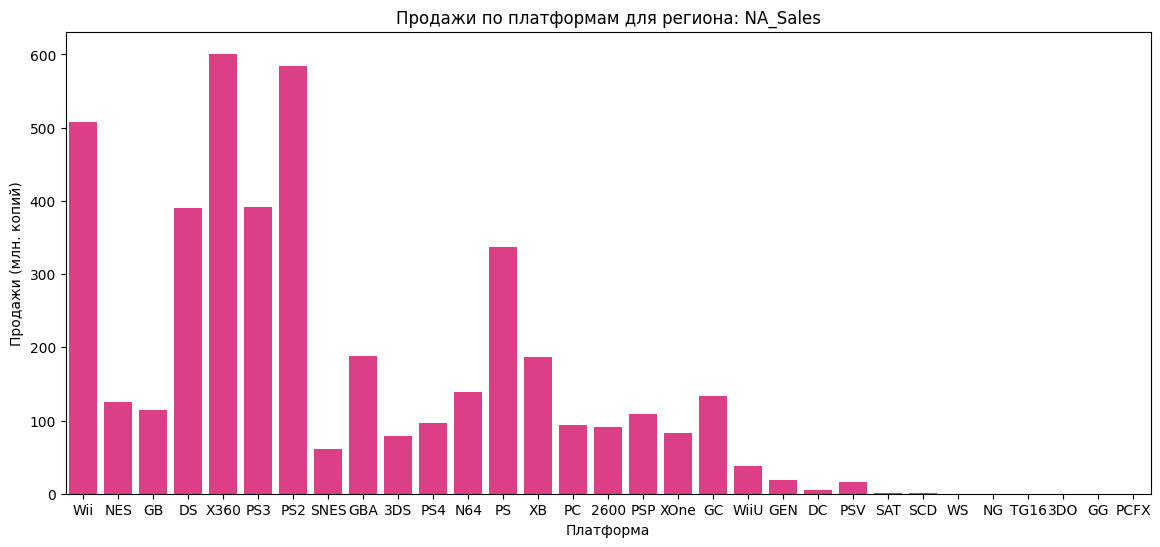

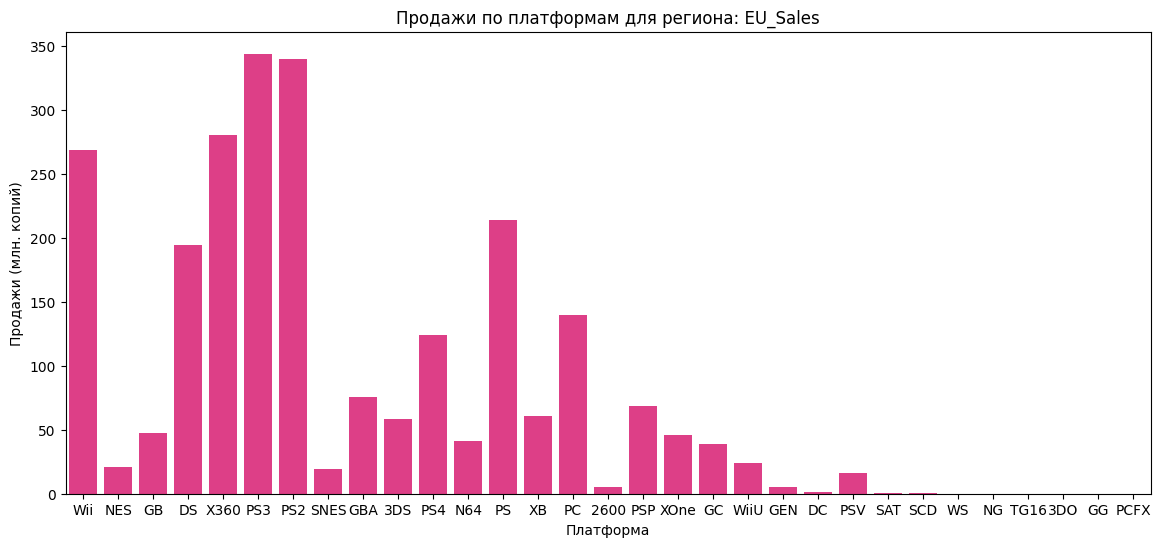

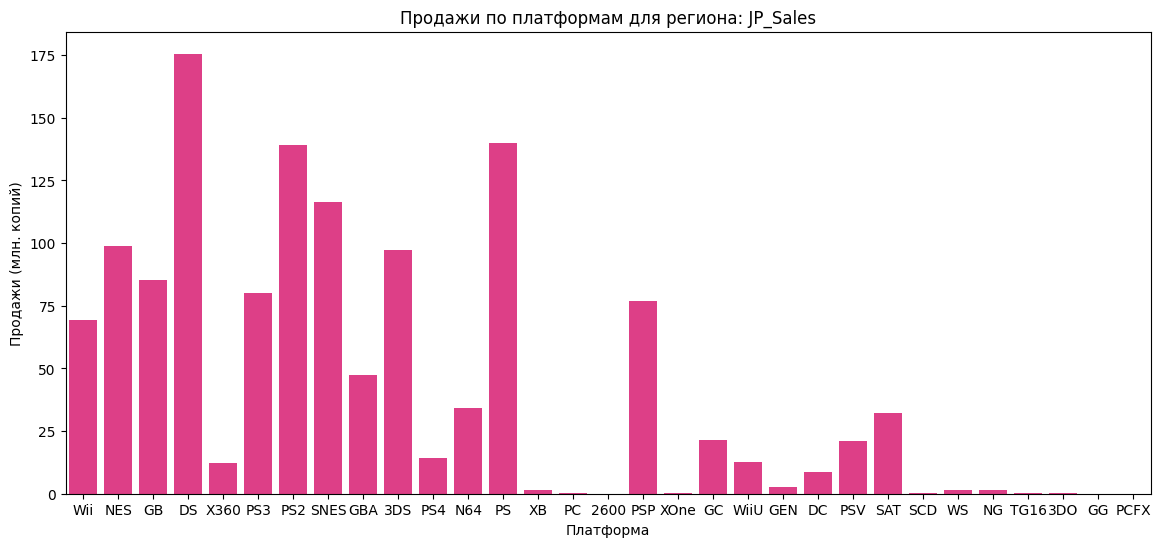

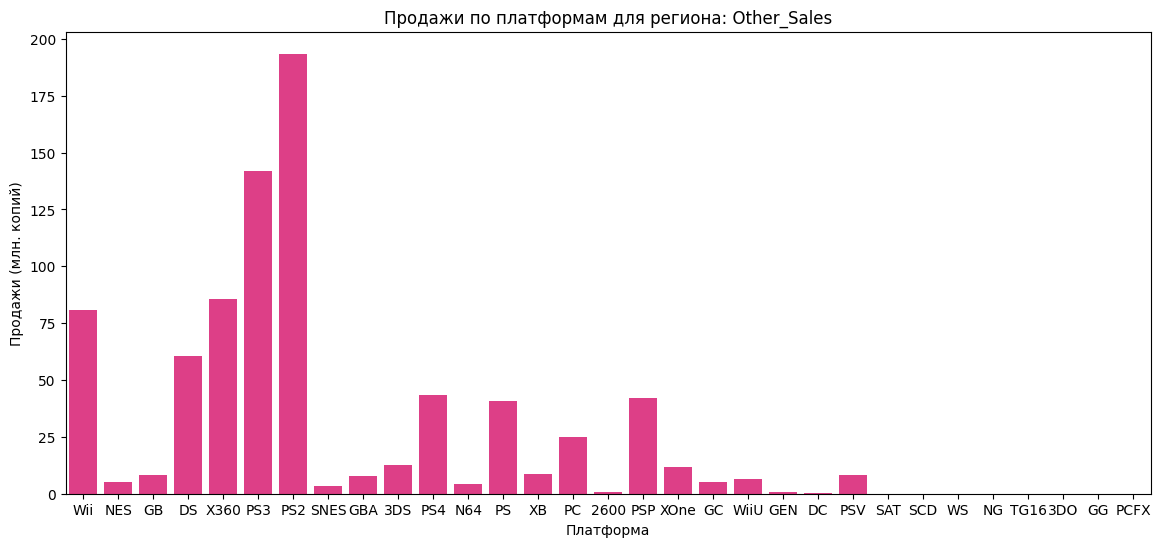

In [28]:
for region in regions:
    visual_region_sales_by_platform(region)

Как мы видим, для различных регионов предпочтительные платформы были разные:
* Серерная Америка - Xbox 360, PS2, Nintendo Wii
* Европа - PS3, PS2, Xbox 360
* Япония - Nintendo DS, PS, PS2
* Остальной мир - PS2, PS3

#### Успешные жанры

In [29]:
def visual_region_sales_by_genre(region: str):
    plt.figure(figsize=(14, 6))
    sns.barplot(data=dataset, x="Genre", y=region,  estimator=np.sum, errorbar=('ci', False), color="#F72585")
    plt.xlabel("Жанр")
    plt.ylabel("Продажи (млн. копий)")
    plt.title(f"Продажи по жанрам для региона: {region}")
    plt.show()

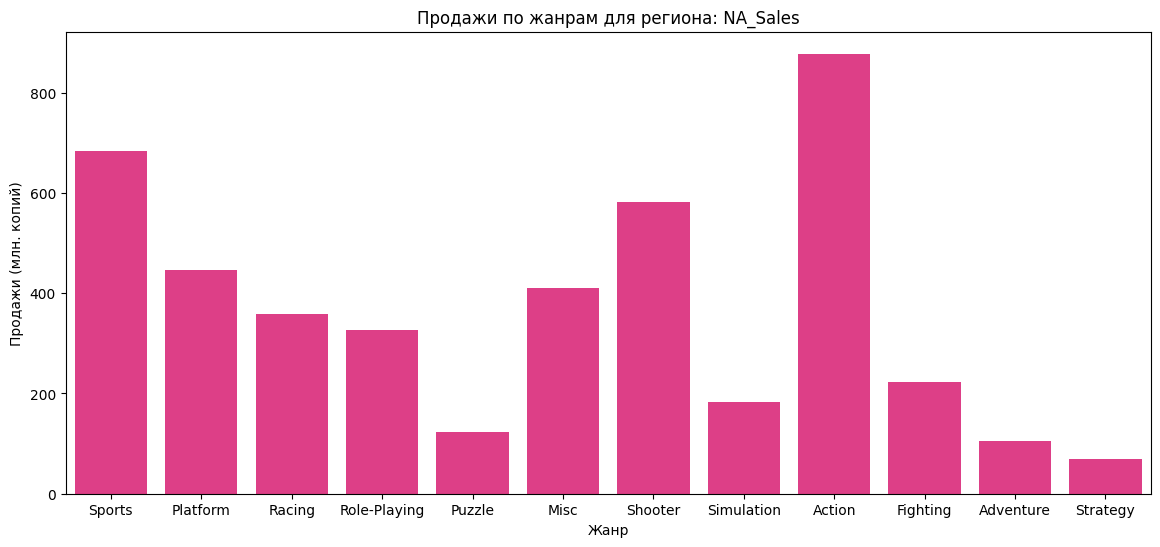

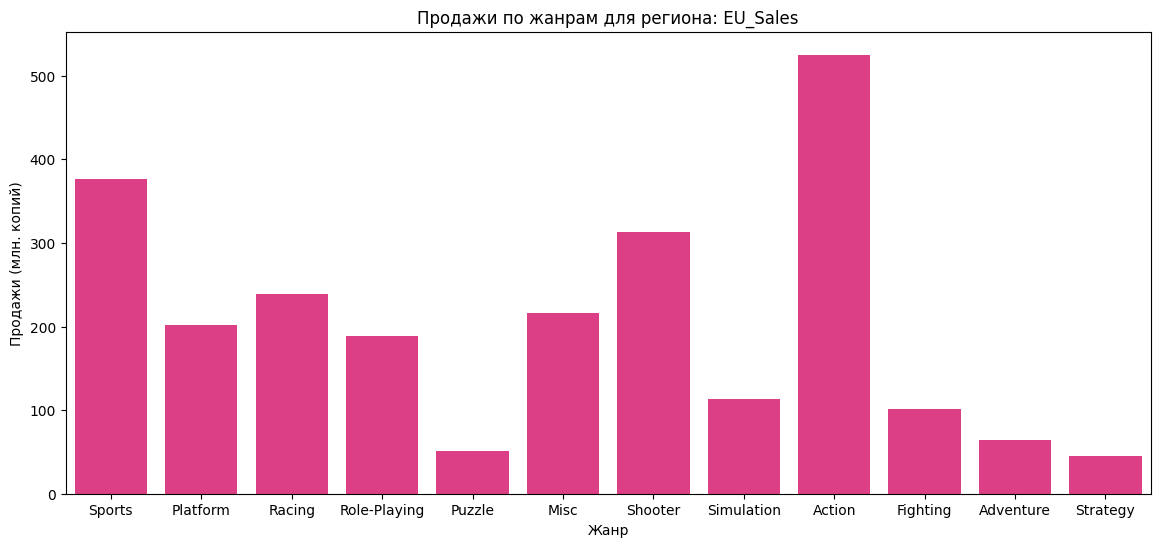

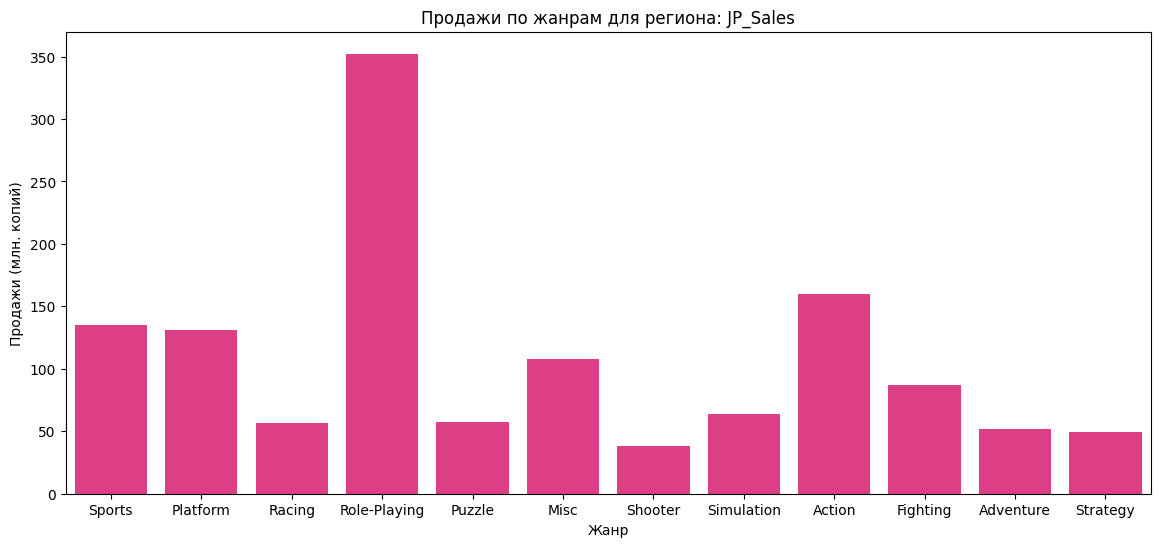

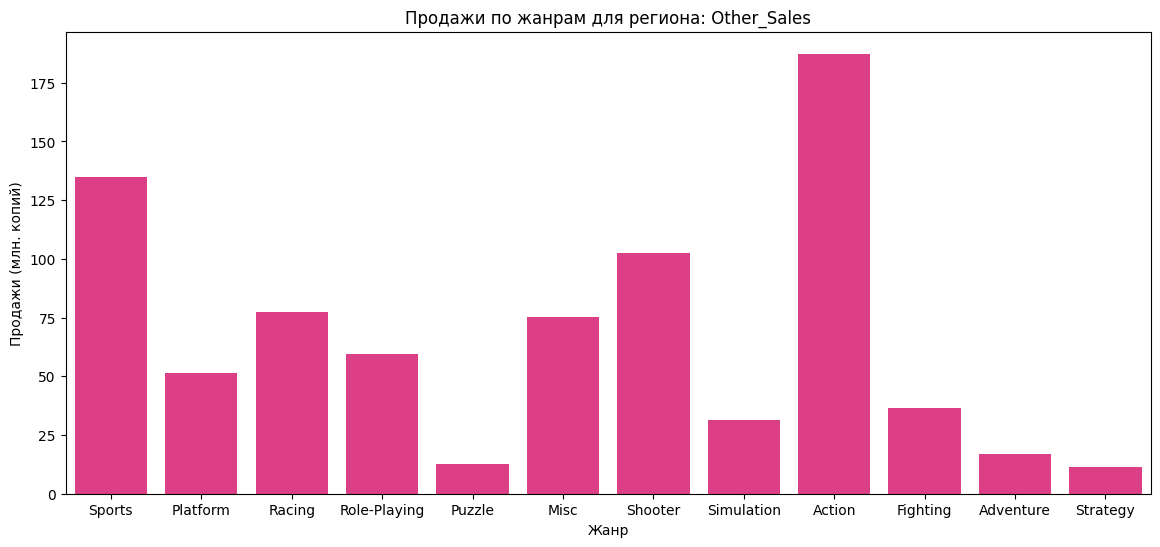

In [30]:
for region in regions:
    visual_region_sales_by_genre(region)

Есть различия в популярности жанров в разных регионах:
* Северная Америка, Европа и остальной мир - Экшн, Спортивные симуляторы, Шутеры
* Япония - РПГ (очень сильный отрыв от остальных жанров)

### Анализ топовых игр

#### Топ-10 игр за всё время

In [31]:
dataset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [32]:
# Найдем топ-10 игр по глобальным продажам
dataset_top10 = dataset.groupby("Name").sum().nlargest(10, columns=["Global_Sales"])

# Фильтруем строки исходного датасета по топ-10 именам
filtered_dataset = dataset[dataset["Name"].isin(dataset_top10.index)]

dataset_top10["Genre"] = filtered_dataset.drop_duplicates(subset="Name").set_index("Name")["Genre"]
dataset_top10["Year"] = filtered_dataset.drop_duplicates(subset="Name").set_index("Name")["Year"]
dataset_top10["Publisher"] = filtered_dataset.drop_duplicates(subset="Name").set_index("Name")["Publisher"]

dataset_top10

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\734167743.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_top10 = dataset.groupby("Name").sum().nlargest(10, columns=["Global_Sales"])


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre,Year,Publisher
Name,,,,,,,,
Wii Sports,41.49,29.02,3.77,8.46,82.74,Sports,2006,Nintendo
Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92,Action,2013,Take-Two Interactive
Super Mario Bros.,32.48,4.88,6.96,0.99,45.31,Platform,1985,Nintendo
Tetris,26.17,2.95,6.03,0.69,35.84,Puzzle,1989,Nintendo
Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,Racing,2008,Nintendo
Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,Sports,2009,Nintendo
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37,Role-Playing,1996,Nintendo
Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.03,Shooter,2010,Activision
Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83,Shooter,2011,Activision


In [33]:
for game_name in dataset_top10.index:
    platforms = filtered_dataset[filtered_dataset["Name"] == game_name]["Platform"].to_list()
    print(f"{game_name}:    {' | '.join(platforms)}")

Wii Sports:    Wii
Grand Theft Auto V:    PS3 | X360 | PS4 | XOne | PC
Super Mario Bros.:    NES | GB
Tetris:    GB | NES
Mario Kart Wii:    Wii
Wii Sports Resort:    Wii
Pokemon Red/Pokemon Blue:    GB
Call of Duty: Black Ops:    X360 | PS3 | PC | Wii | DS
Call of Duty: Modern Warfare 3:    X360 | PS3 | PC | Wii
New Super Mario Bros.:    DS


Нельзя сказать, что год выпуска, жанр или платформа сильно влияет на успех игры. Но издатель (особенно Nintendo) может этому способствовать. Дальше мы проанализируем топ-игры за каждый год.

#### Игра года

In [34]:
top_game_by_year = pd.DataFrame()

for year in dataset["Year"].unique():
    filtered_dataset = dataset[dataset["Year"] == year]

    top1 = filtered_dataset.groupby("Name").sum().nlargest(1, columns=["Global_Sales"])

    filtered_dataset = dataset[dataset["Name"].isin(top1.index)]

    top1["Genre"] = filtered_dataset.drop_duplicates(subset="Name").set_index("Name")["Genre"]
    top1["Year"] = filtered_dataset.drop_duplicates(subset="Name").set_index("Name")["Year"]
    top1["Publisher"] = filtered_dataset.drop_duplicates(subset="Name").set_index("Name")["Publisher"]

    top_game_by_year = pd.concat([top_game_by_year, top1])


top_game_by_year.sort_values(by="Year")

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1656259624.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top1 = filtered_dataset.groupby("Name").sum().nlargest(1, columns=["Global_Sales"])
C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1656259624.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top1 = filtered_dataset.groupby("Name").sum().nlargest(1, columns=["Global_Sales"])
C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\1656259624.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre,Year,Publisher
Name,,,,,,,,
Asteroids,4.00,0.26,0.00,0.05,4.31,Shooter,1980,Atari
Pitfall!,4.21,0.24,0.00,0.05,4.50,Platform,1981,Activision
Pac-Man,7.28,0.45,0.00,0.08,7.81,Puzzle,1982,Atari
Baseball,0.73,0.10,2.35,0.02,3.20,Sports,1983,Nintendo
Duck Hunt,26.93,0.63,0.28,0.47,28.31,Shooter,1984,Nintendo
Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,Platform,1985,Nintendo
The Legend of Zelda,3.74,0.93,1.69,0.14,6.51,Action,1986,Nintendo
Zelda II: The Adventure of Link,2.19,0.50,1.61,0.08,4.38,Adventure,1987,Nintendo
Super Mario Bros. 3,9.54,3.44,3.84,0.46,17.28,Platform,1988,Nintendo


По лучшим жанрам опять сильный разброс, по лучшим издателям можно сделать более смелое заявление:
* до 2000-ых — Nintendo
* 2000-2010-е — Nintendo, Activision и Take-Two Interactive

### Анализ топ издателей

#### Топ-10 лучших издателей за всё время

In [35]:
# Найдем топ-10 издателей по глобальным продажам
dataset_top10 = dataset.groupby("Publisher").sum().nlargest(10, columns=["Global_Sales"])

dataset_top10

C:\Users\Руслан\AppData\Local\Temp\ipykernel_23100\3470942625.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset_top10 = dataset.groupby("Publisher").sum().nlargest(10, columns=["Global_Sales"])


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,603.61,375.95,14.97,130.44,1125.20
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72
Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
THQ,208.77,94.73,5.01,32.14,340.77
Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64
Sega,109.40,82.00,57.03,24.52,272.99


In [36]:
filtered_dataset = dataset[dataset["Publisher"].isin(dataset_top10.index)]

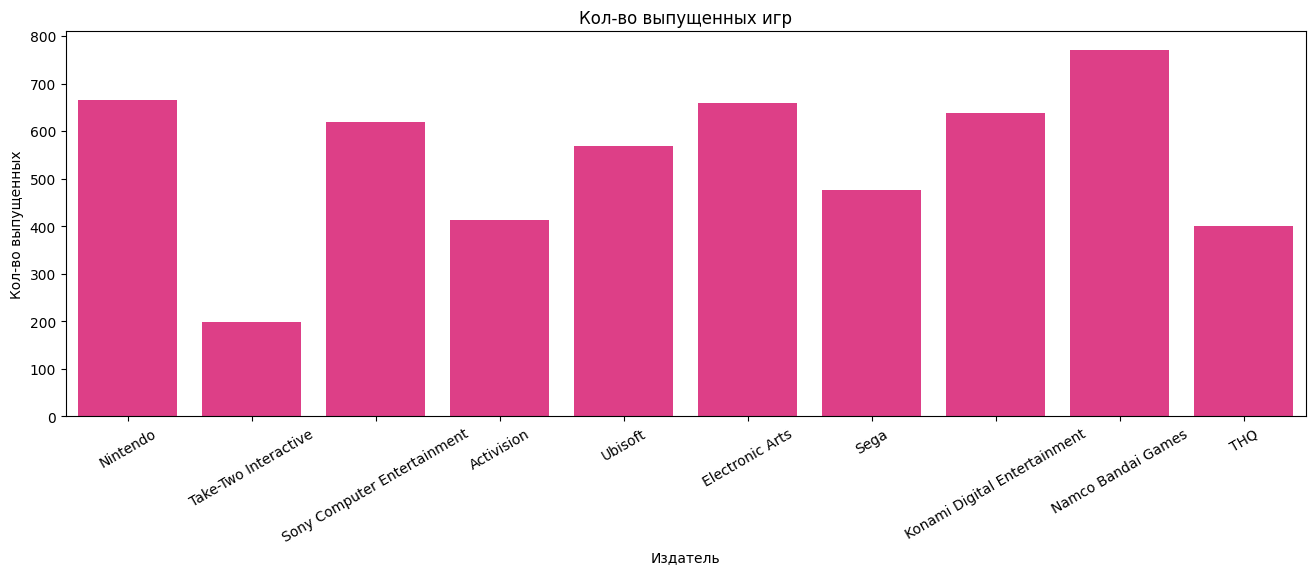

In [37]:
plt.figure(figsize=(16, 5))
sns.countplot(data=filtered_dataset.drop_duplicates("Name"), x="Publisher", color="#F72585")
plt.xticks(rotation=30)
plt.title("Кол-во выпущенных игр")
plt.xlabel("Издатель")
plt.ylabel("Кол-во выпущенных")
plt.show()

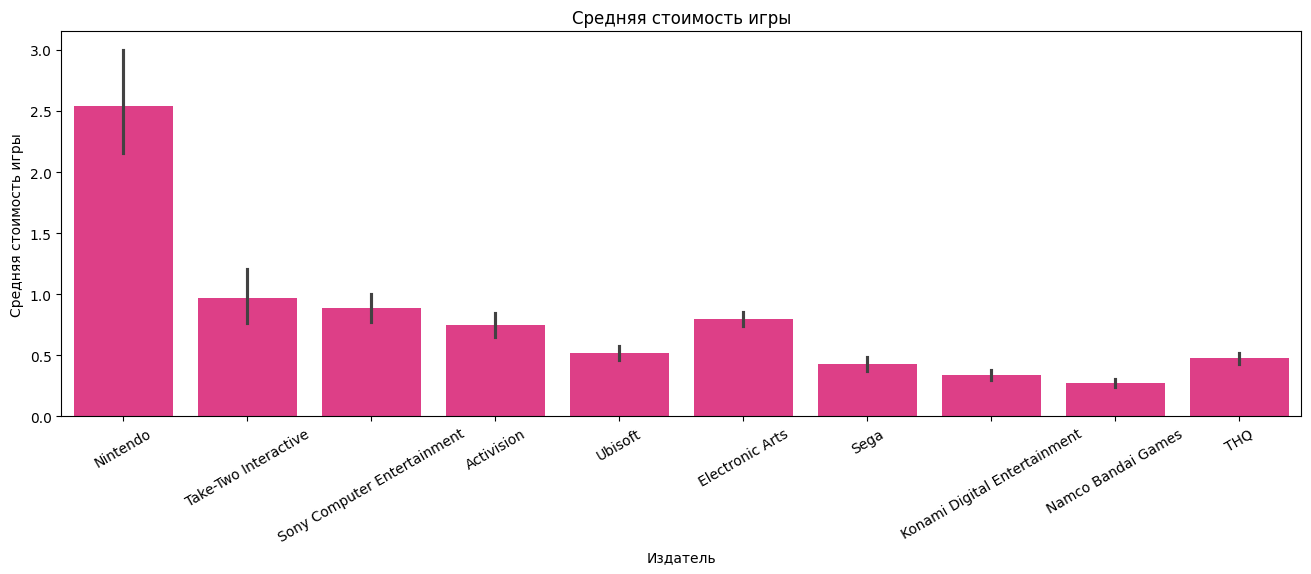

In [38]:
plt.figure(figsize=(16, 5))
sns.barplot(data=filtered_dataset, x="Publisher", y="Global_Sales", color="#F72585")
plt.xticks(rotation=30)
plt.title("Средняя стоимость игры")
plt.xlabel("Издатель")
plt.ylabel("Средняя стоимость игры")
plt.show()

Есть компании, которые выигрывают за счёт различных тактик: кол-во, качество и оба варианта. Условно разделить компании на такие группы можно так:
* Количество — Konami Digital Entertainment, Namco Bandai Games
* Качество — Take-Two Interactive, Activision, Sega, Ubisoft, THQ
* Оба Варианта — Nintendo, Sony Computer Entrtainment, Electronic Arts

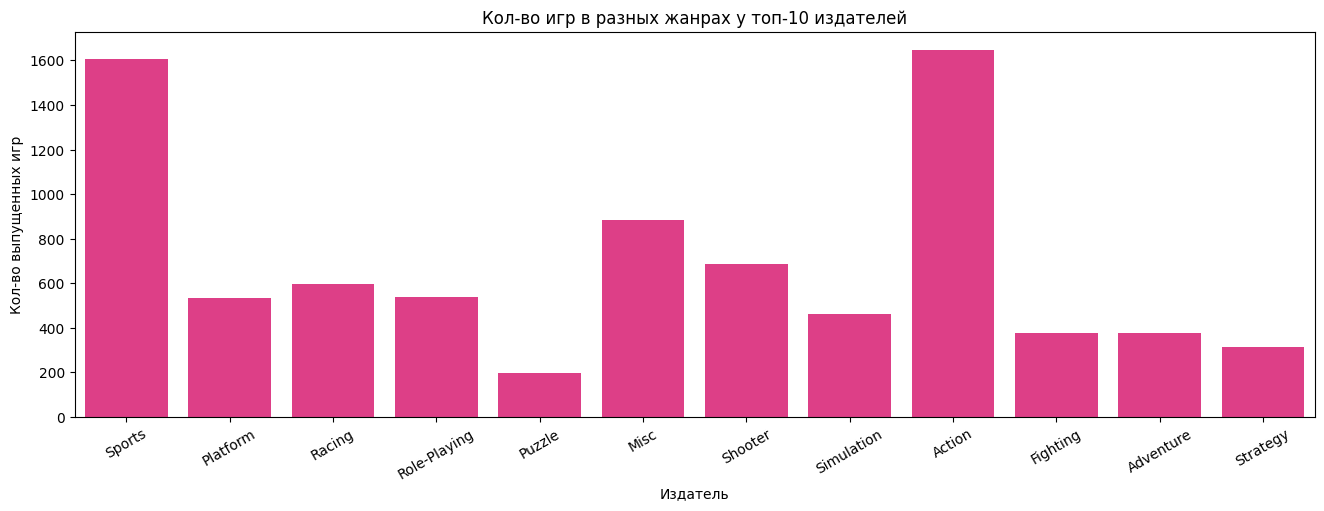

In [39]:
plt.figure(figsize=(16, 5))
sns.countplot(data=filtered_dataset, x="Genre", color="#F72585")
plt.xticks(rotation=30)
plt.title(f"Кол-во игр в разных жанрах у топ-10 издателей")
plt.xlabel("Издатель")
plt.ylabel("Кол-во выпущенных игр")
plt.show()

In [40]:
def visual_countplot_of_genres_by_publisher(publisher: str):
    dataset = filtered_dataset[filtered_dataset["Publisher"] == publisher].drop_duplicates("Name")
    plt.figure(figsize=(16, 5))
    sns.countplot(data=dataset, x="Genre", color="#F72585")
    plt.xticks(rotation=30)
    plt.title(f"Кол-во игр в разных жанрах у издателя: {publisher}")
    plt.xlabel("Издатель")
    plt.ylabel("Кол-во выпущенных игр")
    plt.show()

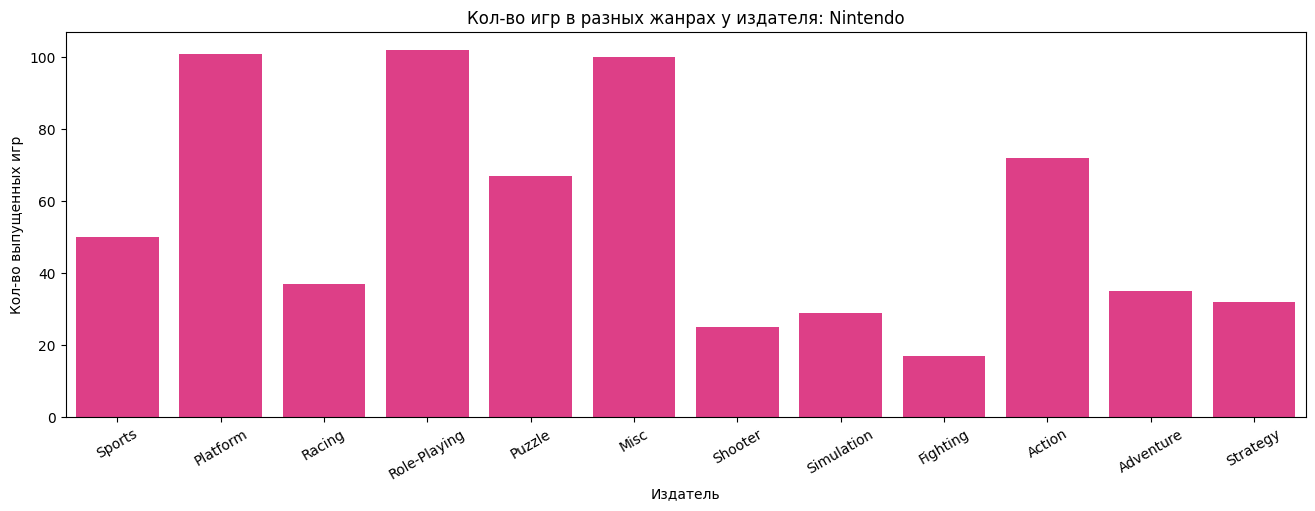

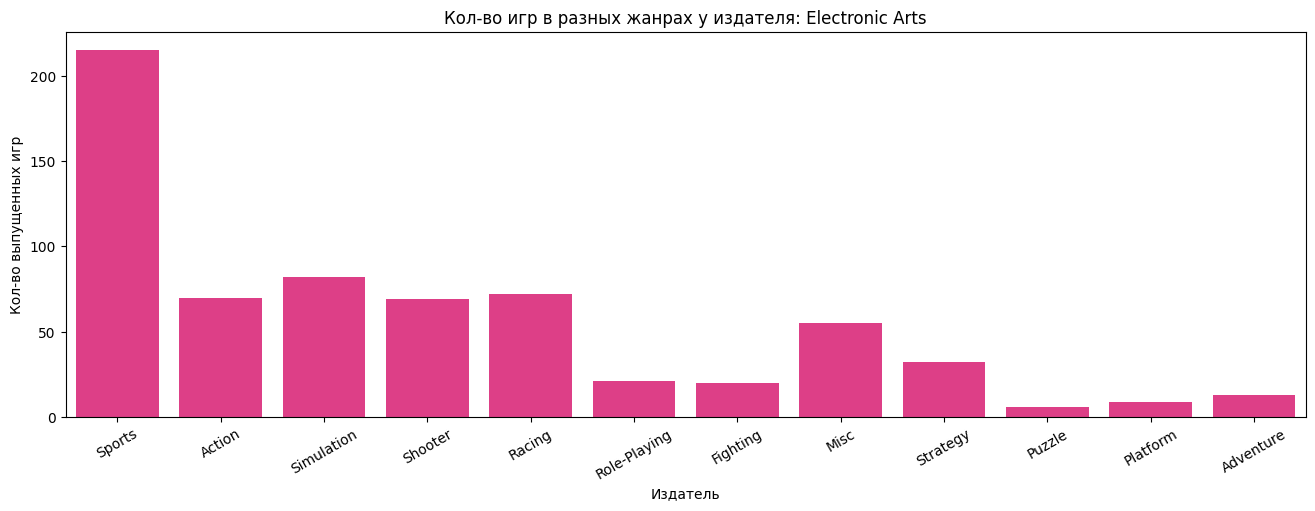

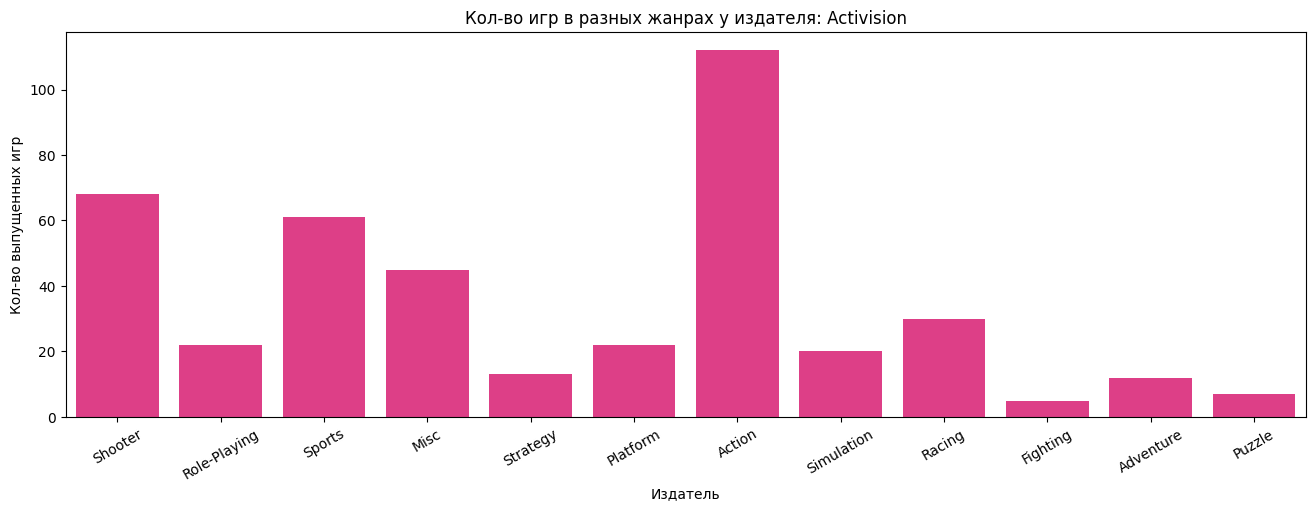

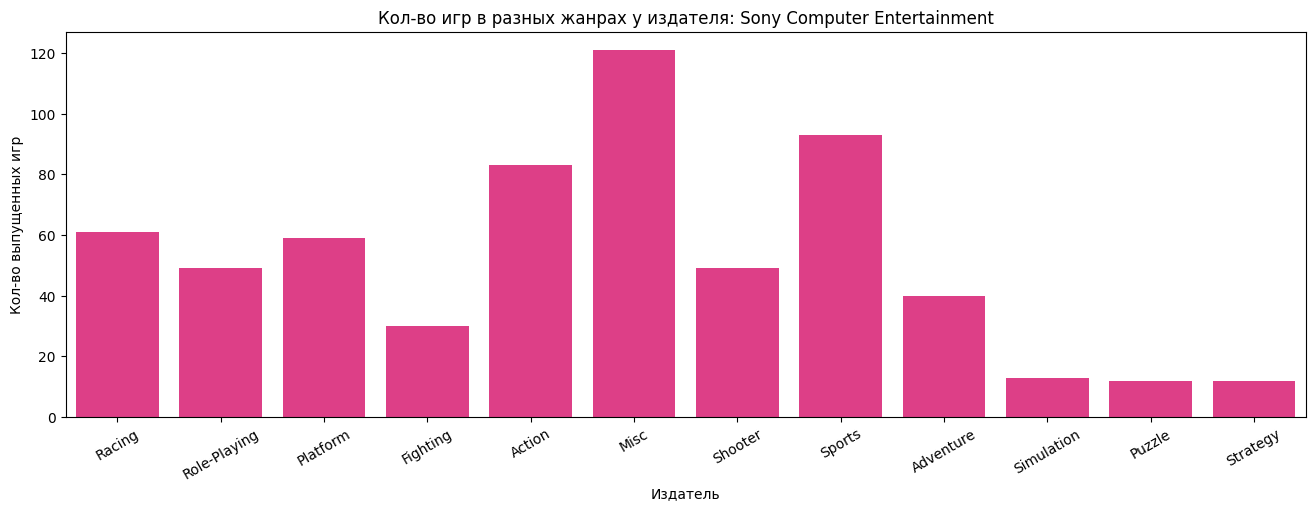

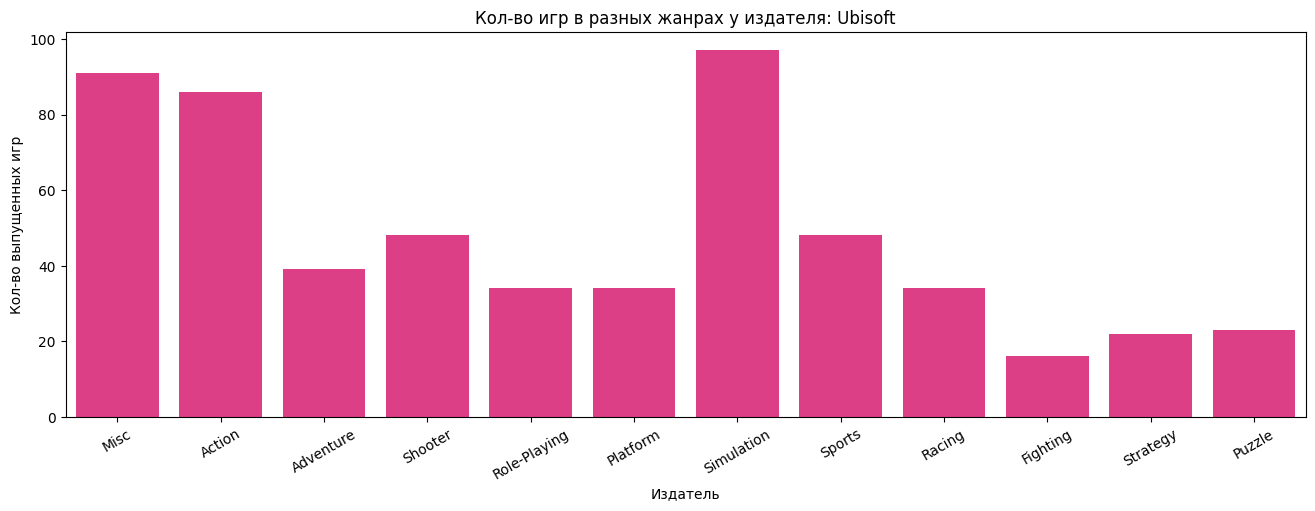

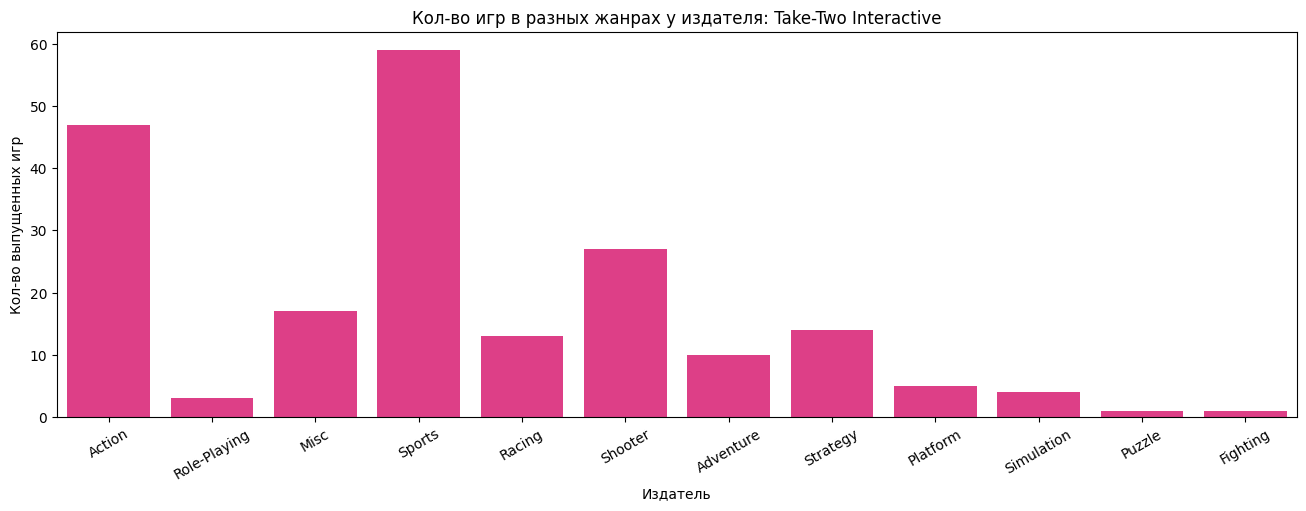

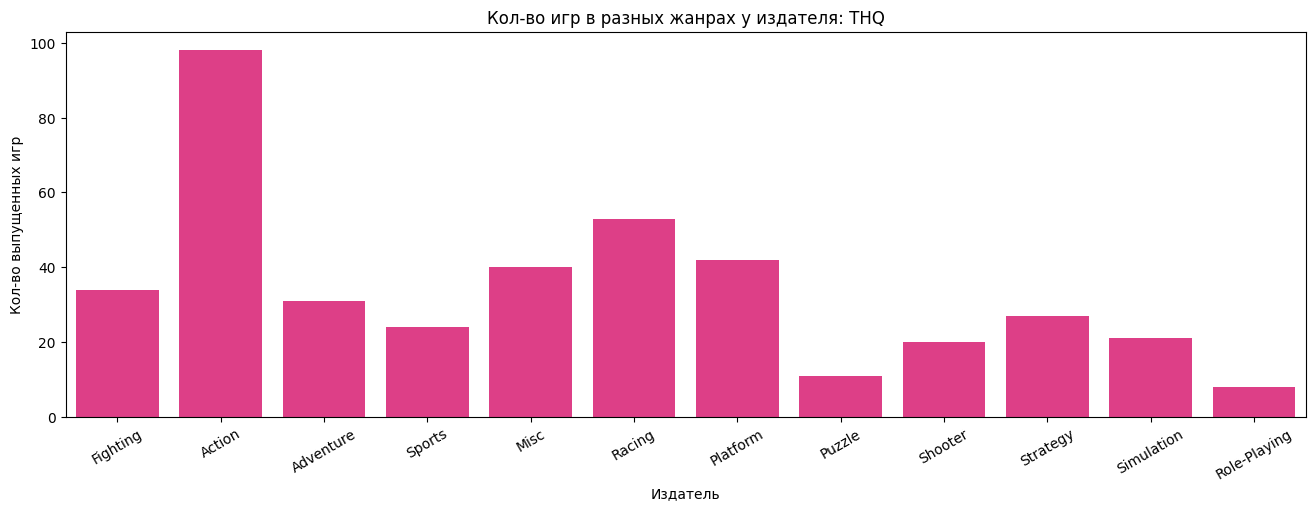

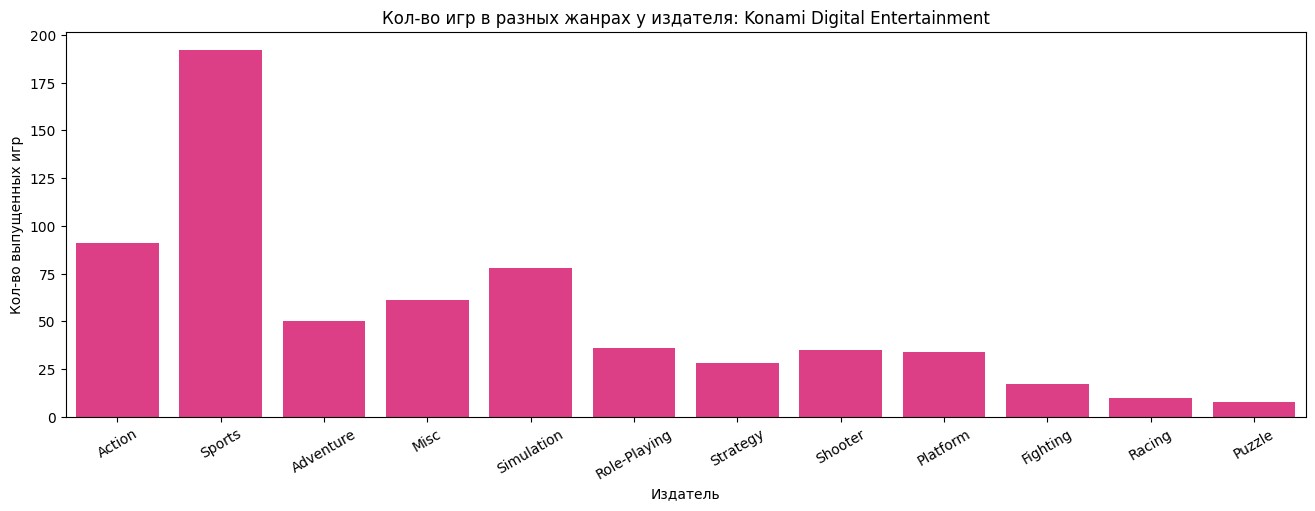

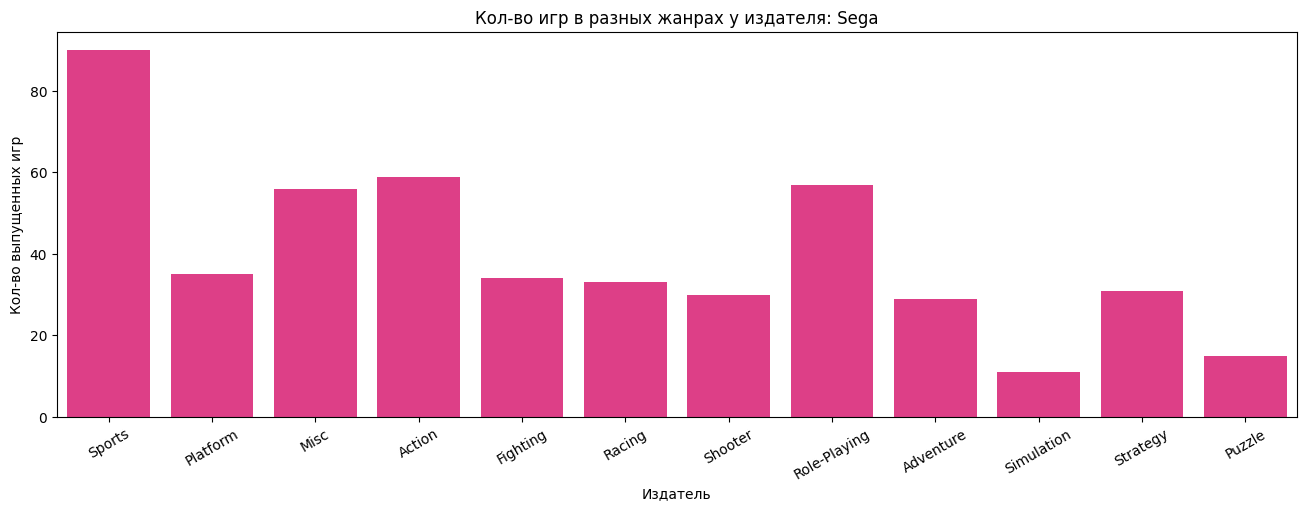

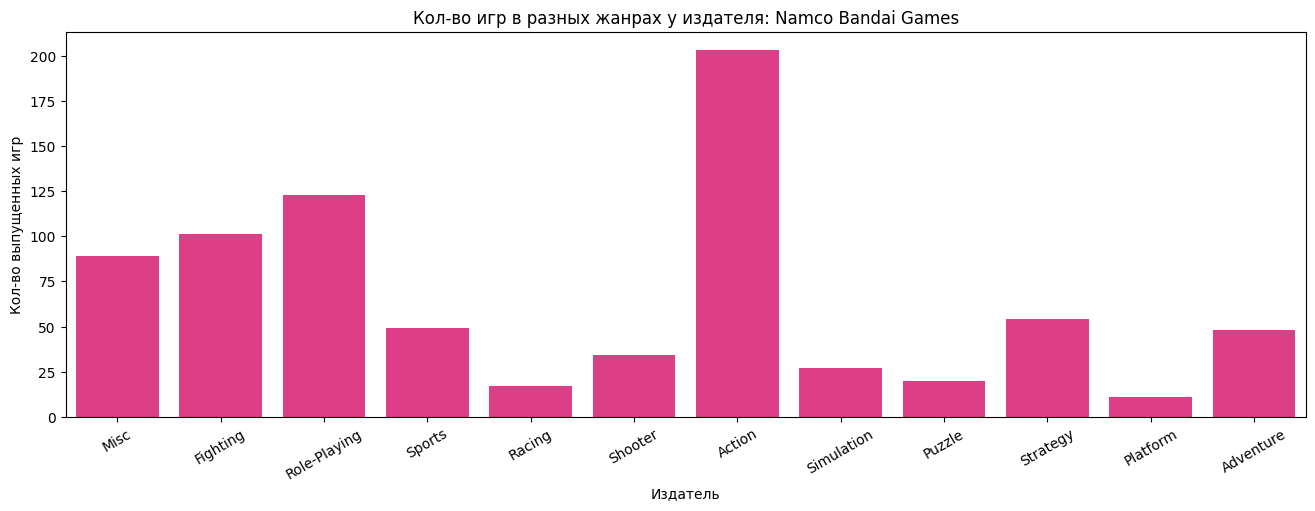

In [41]:
for publisher in dataset_top10.index:
    visual_countplot_of_genres_by_publisher(publisher)

Издатели акцентируют внимание максимум на 2-3 жанрах игр. При этом в общей графике видно, что основные жанры у топ-10 издателей следующие:
* Экшн
* Спортивные симуляторы
* Разное

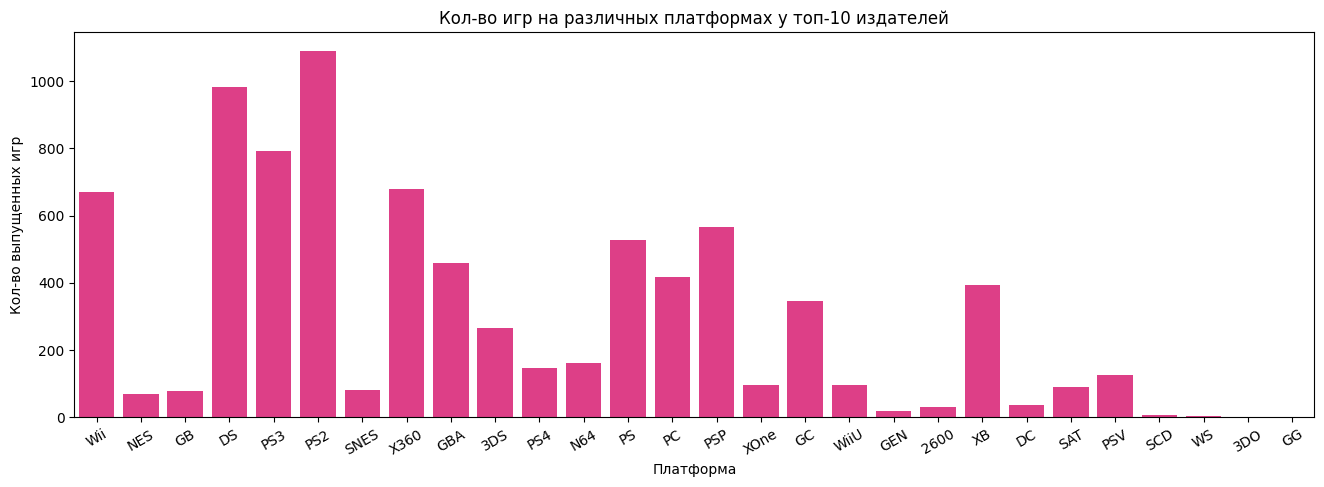

In [42]:
plt.figure(figsize=(16, 5))
sns.countplot(data=filtered_dataset, x="Platform", color="#F72585")
plt.xticks(rotation=30)
plt.title(f"Кол-во игр на различных платформах у топ-10 издателей")
plt.xlabel("Платформа")
plt.ylabel("Кол-во выпущенных игр")
plt.show()

Отдельно визуализировать график для каждого издателя нет смысла. В общем графике предпочтительные платформы сохраняют общую тенденцию (как для всех игр):
* PS2
* DS
* PS3 

## Вывод

Я проанализировал продажи по видеоиграм и сделал выводы на основании графиков и таблиц.

Можно ли утверждать, что присутствуют факторы, влияющие на успешность игры? - Да, например: издатель, платформа, год выпуска, частично жанр. 

Но не стоит исключать вероятность случайности, а также нерепрезентативной выборки. Я бы хотел получить информацию не общую о каждой игре, а более детализированные продажи по годам для каждой игры, чтобы создать временные ряды для более корректного анализа.

В целом, я ответил на все поставленные передо мной вопросы и могу считать этот проект завершённым.

Совет для издателей игр: обратите внимание на популярность жанра в данный момент, регион выпуска игры. Надеюсь, предоставленный отчёт поможет сделать правильный выбор.